# Final Data Project: Too few women sit in the German Bundestag

*Kimberly Nicolaus*

I’d like to investigate to what extent national parliaments in the EU represent their national citizens, in terms of gender and age. In this notebook, I access the datasets, clean the data and do analyses as well as visualizations.

In [1]:
import pandas as pd
from pprint import pprint
import json
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
from collections import Counter
import requests
import seaborn as sns
%matplotlib inline

In [2]:
import pygal
import bokeh

# List of content

## 1. To what extent do national parliaments in the EU represent their national citizens in terms of age?

#### 1.1 First dataset about agegroups in EU countries
1.1.1 First dataset about agegroups in EU countries: Calculate percentages
#### 1.3 Second dataset about agegroups in EU parliaments
1.3.1 Second dataset about agegroups in EU parliaments: Calculate percentages
#### 1.5 Preparing the visualization of the parliaments representation by agegroups
#### 1.6 Calculating the means of all age groups in the dataframes population and parliaments
#### 1.7 Visualization 1: What is the average proportion of each age group?
#### 1.8 Visualization 2: What is the gap between the proportion of this age group in population compared to in parliament?

## 2. To what extent do national parliaments in the EU represent their national citizens in terms of gender?
#### 2.1 Third dataset about gender (females) in EU countries
#### 2.2 Fourth dataset about gender (males) in EU countries
#### 2.3 Fifth dataset about gender (females and males) in EU parliaments
#### 2.4 Visualization 3: Where are women the least represented?
#### 2.5 Visualization 4: Propotion of women in population and parliaments



///

# 1. To what extent do national parliaments in the EU represent their national citizens in terms of age?

## 1.1 First dataset about agegroups in EU countries

Access to the original source of the dataset: https://ec.europa.eu/eurostat/databrowser/view/demo_pjangroup/default/table?lang=en

In [3]:
# Open EU_agegroups_total which shows the distribution of age among females and males in all European countries
EU_agegroups_total = pd.read_csv('EU_2020_agegroups_total.csv')

In [4]:
EU_agegroups_total

,DATAFLOW,LAST UPDATE,freq,unit,sex,age,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,T,TOTAL,AL,2020,2845955,NaN
1,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,T,TOTAL,AM,2020,2959694,NaN
2,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,T,TOTAL,AT,2020,8901064,NaN
3,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,T,TOTAL,AZ,2020,10067108,NaN
4,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,T,TOTAL,BE,2020,11522440,NaN
...,...,...,...,...,...,...,...,...,...,...
1011,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,T,Y_LT5,SI,2020,100787,NaN
1012,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,T,Y_LT5,SK,2020,294128,NaN
1013,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,T,Y_LT5,TR,2020,6345136,NaN
1014,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,T,Y_LT5,UA,2020,1805636,NaN


In [5]:
# The data looks messy. Drop the columns: DATAFLOW, LAST UPDATE, freq
EU_agegroups_total.drop(['DATAFLOW','LAST UPDATE', 'freq'], axis = 1, inplace = True)

In [6]:
EU_agegroups_total

,unit,sex,age,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,NR,T,TOTAL,AL,2020,2845955,NaN
1,NR,T,TOTAL,AM,2020,2959694,NaN
2,NR,T,TOTAL,AT,2020,8901064,NaN
3,NR,T,TOTAL,AZ,2020,10067108,NaN
4,NR,T,TOTAL,BE,2020,11522440,NaN
...,...,...,...,...,...,...,...
1011,NR,T,Y_LT5,SI,2020,100787,NaN
1012,NR,T,Y_LT5,SK,2020,294128,NaN
1013,NR,T,Y_LT5,TR,2020,6345136,NaN
1014,NR,T,Y_LT5,UA,2020,1805636,NaN


In [7]:
# Drop also the following columns: TIME_PERIOD, sex, OBS_FLAG
EU_agegroups_total.drop(['unit', 'TIME_PERIOD', 'sex', 'OBS_FLAG'], axis = 1, inplace = True)

In [8]:
EU_agegroups_total

,age,geo,OBS_VALUE
0,TOTAL,AL,2845955
1,TOTAL,AM,2959694
2,TOTAL,AT,8901064
3,TOTAL,AZ,10067108
4,TOTAL,BE,11522440
...,...,...,...
1011,Y_LT5,SI,100787
1012,Y_LT5,SK,294128
1013,Y_LT5,TR,6345136
1014,Y_LT5,UA,1805636


In [9]:
# What are the country codes for all EU countries?
fips = pd.read_html('https://en.wikipedia.org/wiki/List_of_FIPS_country_codes')

In [10]:
# Access the EU country codes by columns in alphabetical order
fips[0]

,Code,Short-form name
0,.mw-parser-output .monospaced{font-family:mono...,Aruba
1,AC,Antigua and Barbuda
2,AE,United Arab Emirates
3,AF,Afghanistan
4,AG,Algeria
5,AJ,Azerbaijan
6,AL,Albania
7,AM,Armenia
8,AN,Andorra
9,AO,Angola


In [11]:
# Just keep  EU countries in the dataset --> create my_list with only EU countries
# Assign a new name to the new dataframe containing only EU countries
my_list = ['BE', 'BG', 'CZ', 
           'DK', 'DE', 'EE', 
           'IE', 'EL', 'ES', 
           'FR', 'HR', 'IT', 
           'CY', 'LV', 'LT', 
           'LU', 'HU', 'MT', 
           'NL', 'AT', 'PL', 
           'PT', 'RO', 'SI', 
           'SK', 'FI', 'SE']
EU_agegroups_total_1 = EU_agegroups_total[EU_agegroups_total['geo'].isin(my_list)]

In [12]:
# This dataframe only contains EU countries.
EU_agegroups_total_1

,age,geo,OBS_VALUE
2,TOTAL,AT,8901064
4,TOTAL,BE,11522440
5,TOTAL,BG,6951482
7,TOTAL,CY,888005
8,TOTAL,CZ,10693939
...,...,...,...
1007,Y_LT5,PT,436202
1008,Y_LT5,RO,1002521
1010,Y_LT5,SE,601718
1011,Y_LT5,SI,100787


In [13]:
# Display the columns of the dataframe
EU_agegroups_total_1.columns

Index(['age', 'geo', 'OBS_VALUE'], dtype='object')

In [14]:
# Change the dataframe from longform to widthform (agegroups as columns & geo as index)
# Assign a new name to the new dataframe
EU_agegroups_total_2 = EU_agegroups_total_1.pivot(index = 'geo', columns = 'age', values = ['OBS_VALUE'])

In [15]:
EU_agegroups_total_2

OBS_VALUE                                                            \
age     TOTAL UNK   Y10-14   Y15-19   Y20-24   Y25-29   Y30-34   Y35-39   
geo                                                                       
AT    8901064   0   421998   437855   517770   601402   607628   610304   
BE   11522440   0   668369   636442   672317   744436   747537   751879   
BG    6951482   0   342218   312977   301636   390614   476452   479936   
CY     888005   0    46307    49531    63488    75334    75069    68582   
CZ   10693939   0   577984   478030   483032   651892   722127   762998   
DE   83166711   0  3702913  3939243  4608431  5074471  5495720  5289210   
DK    5822763   0   338629   343282   381891   400810   358346   328462   
EE    1328976   0    74689    62917    63051    81682   101265    95087   
EL   10718565   0   553606   549705   559606   564676   596438   736795   
ES   47332614   0  2535060  2399993  2352185  2544980  2778255  3325066   
FI    5525292   0   308825   296671   313944   355685   350768   360782   
FR   67320216   0  4226790  4173149  3772518  3747967  4079758  4249745   
HR    4058165   0   202389   198576   238386   238457   255340   280875   
HU    9769526   0   496937   487664   541142   630891   619934   651992   
IE    4964440   0   348422   323325   305817   290159   324923   388691   
IT   59641488   0  2835060  2871056  2955888  3128494  3282441  3572191   
LT    2794090   0   132642   130926   154360   185376   187446   171793   
LU     626108   0    33101    33331    38540    47573    49433    49151   
LV    1907675   0   102501    89522    83996   115546   137794   130379   
MT     514564   0    21886    22146    32780    46198    46735    42166   
NL   17407585   0   953204  1049158  1094585  1138965  1102103  1045828   
PL   37958138   0  1998280  1786579  2018851  2508023  2870306  3139152   
PT   10295909   0   504940   545322   550444   547680   566594   672422   
RO   19328838   0  1062583  1025575  1001902  1054739  1370847  1323981   
SE   10327589   0   609019   568909   587699   739696   715891   650598   
SI    2095861   0   104756    93729   103089   113876   136265   152537   
SK    5457873   0   279531   262751   292244   367835   411370   436101   

                       ...                                               \
age   Y40-44   Y45-49  ...   Y55-59   Y60-64   Y65-69   Y70-74   Y75-79   
geo                    ...                                                
AT    564441   622453  ...   685485   565635   450381   391654   377545   
BE    738624   768805  ...   800140   723984   623529   547046   377305   
BG    532837   522513  ...   473775   474816   463819   418088   283876   
CY     58281    53029  ...    54512    49785    44929    38762    27667   
CZ    923446   839278  ...   653501   651567   678927   602974   408629   
DE   4909026  5273358  ...  6737305  5647771  4859032  3674095  3876420   
DK    364159   391889  ...   388538   344371   319275   324554   239836   
EE     91061    91734  ...    87640    85736    77501    62709    48633   
EL    799789   799716  ...   717651   682649   609002   568279   435679   
ES   3954989  3878629  ...  3368279  2918845  2431759  2224324  1760180   
FI    346475   314373  ...   368871   359619   356960   349731   212177   
FR   4083561  4523901  ...  4369241  4104649  3902936  3476419  2216493   
HR    277900   266906  ...   290286   295571   267320   203186   160970   
HU    837893   749855  ...   572104   651379   643679   482487   377278   
IE    388772   357126  ...   291378   257341   223341   189444   132723   
IT   4187464  4749765  ...  4537491  3893350  3471014  3324360  2644013   
LT    174252   195470  ...   217731   196708   154540   126480   110410   
LU     47058    46134  ...    42549    34475    27510    22060    16292   
LV    124087   131906  ...   138282   131847   109804    90370    80187   
MT     37793    32262  ...    30863    31108    28443    28329    16589   
NL   1022008  1186068  ...  

In [16]:
# How are the columns called?
EU_agegroups_total_2.columns

MultiIndex([('OBS_VALUE',  'TOTAL'),
            ('OBS_VALUE',    'UNK'),
            ('OBS_VALUE', 'Y10-14'),
            ('OBS_VALUE', 'Y15-19'),
            ('OBS_VALUE', 'Y20-24'),
            ('OBS_VALUE', 'Y25-29'),
            ('OBS_VALUE', 'Y30-34'),
            ('OBS_VALUE', 'Y35-39'),
            ('OBS_VALUE', 'Y40-44'),
            ('OBS_VALUE', 'Y45-49'),
            ('OBS_VALUE',   'Y5-9'),
            ('OBS_VALUE', 'Y50-54'),
            ('OBS_VALUE', 'Y55-59'),
            ('OBS_VALUE', 'Y60-64'),
            ('OBS_VALUE', 'Y65-69'),
            ('OBS_VALUE', 'Y70-74'),
            ('OBS_VALUE', 'Y75-79'),
            ('OBS_VALUE', 'Y80-84'),
            ('OBS_VALUE', 'Y_GE75'),
            ('OBS_VALUE', 'Y_GE80'),
            ('OBS_VALUE', 'Y_GE85'),
            ('OBS_VALUE',  'Y_LT5')],
           names=[None, 'age'])

In [17]:
# Drop more columns that are not neeeded
EU_agegroups_total_2.drop([('OBS_VALUE',    'UNK'),
                          ('OBS_VALUE', 'Y80-84'),
                          ('OBS_VALUE', 'Y_GE75'),
                          ('OBS_VALUE', 'Y_GE85')], axis = 1, inplace = True)

In [18]:
# Did it work?
EU_agegroups_total_2.columns

MultiIndex([('OBS_VALUE',  'TOTAL'),
            ('OBS_VALUE', 'Y10-14'),
            ('OBS_VALUE', 'Y15-19'),
            ('OBS_VALUE', 'Y20-24'),
            ('OBS_VALUE', 'Y25-29'),
            ('OBS_VALUE', 'Y30-34'),
            ('OBS_VALUE', 'Y35-39'),
            ('OBS_VALUE', 'Y40-44'),
            ('OBS_VALUE', 'Y45-49'),
            ('OBS_VALUE',   'Y5-9'),
            ('OBS_VALUE', 'Y50-54'),
            ('OBS_VALUE', 'Y55-59'),
            ('OBS_VALUE', 'Y60-64'),
            ('OBS_VALUE', 'Y65-69'),
            ('OBS_VALUE', 'Y70-74'),
            ('OBS_VALUE', 'Y75-79'),
            ('OBS_VALUE', 'Y_GE80'),
            ('OBS_VALUE',  'Y_LT5')],
           names=[None, 'age'])

In [19]:
# The range of each agegroup is to small
# Each agegroup should contain 10 years, so it is similar to the other dataset 'parliament'
sum_column = EU_agegroups_total_2[('OBS_VALUE', 'Y20-24')] + EU_agegroups_total_2[('OBS_VALUE', 'Y25-29')]
EU_agegroups_total_2["20-29"] = sum_column
print(EU_agegroups_total_2)

    OBS_VALUE                                                                 \
age     TOTAL   Y10-14   Y15-19   Y20-24   Y25-29   Y30-34   Y35-39   Y40-44   
geo                                                                            
AT    8901064   421998   437855   517770   601402   607628   610304   564441   
BE   11522440   668369   636442   672317   744436   747537   751879   738624   
BG    6951482   342218   312977   301636   390614   476452   479936   532837   
CY     888005    46307    49531    63488    75334    75069    68582    58281   
CZ   10693939   577984   478030   483032   651892   722127   762998   923446   
DE   83166711  3702913  3939243  4608431  5074471  5495720  5289210  4909026   
DK    5822763   338629   343282   381891   400810   358346   328462   364159   
EE    1328976    74689    62917    63051    81682   101265    95087    91061   
EL   10718565   553606   549705   559606   564676   596438   736795   799789   
ES   47332614  2535060  2399993  2352185

In [20]:
sum_column_1 = EU_agegroups_total_2[('OBS_VALUE', 'Y30-34')] + EU_agegroups_total_2[('OBS_VALUE', 'Y35-39')]
EU_agegroups_total_2["30-39"] = sum_column_1

In [21]:
sum_column_2 = EU_agegroups_total_2[('OBS_VALUE', 'Y40-44')] + EU_agegroups_total_2[('OBS_VALUE', 'Y45-49')]
EU_agegroups_total_2["40-49"] = sum_column_2

In [22]:
sum_column_3 = EU_agegroups_total_2[('OBS_VALUE', 'Y50-54')] + EU_agegroups_total_2[('OBS_VALUE', 'Y55-59')]
EU_agegroups_total_2["50-59"] = sum_column_3

In [23]:
sum_column_4 = EU_agegroups_total_2[('OBS_VALUE', 'Y60-64')] + EU_agegroups_total_2[('OBS_VALUE', 'Y65-69')]
EU_agegroups_total_2["60-69"] = sum_column_4

In [24]:
sum_column_5 = EU_agegroups_total_2[('OBS_VALUE', 'Y70-74')] + EU_agegroups_total_2[('OBS_VALUE', 'Y75-79')]
EU_agegroups_total_2["70-79"] = sum_column_5

In [25]:
sum_column_6 = EU_agegroups_total_2[('OBS_VALUE',  'Y_LT5')] + EU_agegroups_total_2[('OBS_VALUE',  'Y5-9')] + EU_agegroups_total_2[('OBS_VALUE', 'Y10-14')] 
EU_agegroups_total_2["LT15"] = sum_column_6

In [26]:
# Now the dataframe contains the smaller agegroups (range of 5 years) and the bigger one (range of ten years)
EU_agegroups_total_2

OBS_VALUE                                                                 \
age     TOTAL   Y10-14   Y15-19   Y20-24   Y25-29   Y30-34   Y35-39   Y40-44   
geo                                                                            
AT    8901064   421998   437855   517770   601402   607628   610304   564441   
BE   11522440   668369   636442   672317   744436   747537   751879   738624   
BG    6951482   342218   312977   301636   390614   476452   479936   532837   
CY     888005    46307    49531    63488    75334    75069    68582    58281   
CZ   10693939   577984   478030   483032   651892   722127   762998   923446   
DE   83166711  3702913  3939243  4608431  5074471  5495720  5289210  4909026   
DK    5822763   338629   343282   381891   400810   358346   328462   364159   
EE    1328976    74689    62917    63051    81682   101265    95087    91061   
EL   10718565   553606   549705   559606   564676   596438   736795   799789   
ES   47332614  2535060  2399993  2352185  2544980  2778255  3325066  3954989   
FI    5525292   308825   296671   313944   355685   350768   360782   346475   
FR   67320216  4226790  4173149  3772518  3747967  4079758  4249745  4083561   
HR    4058165   202389   198576   238386   238457   255340   280875   277900   
HU    9769526   496937   487664   541142   630891   619934   651992   837893   
IE    4964440   348422   323325   305817   290159   324923   388691   388772   
IT   59641488  2835060  2871056  2955888  3128494  3282441  3572191  4187464   
LT    2794090   132642   130926   154360   185376   187446   171793   174252   
LU     626108    33101    33331    38540    47573    49433    49151    47058   
LV    1907675   102501    89522    83996   115546   137794   130379   124087   
MT     514564    21886    22146    32780    46198    46735    42166    37793   
NL   17407585   953204  1049158  1094585  1138965  1102103  1045828  1022008   
PL   37958138  1998280  1786579  2018851  2508023  2870306  3139152  2962472   
PT   10295909   504940   545322   550444   547680   566594   672422   784224   
RO   19328838  1062583  1025575  1001902  1054739  1370847  1323981  1536588   
SE   10327589   609019   568909   587699   739696   715891   650598   631263   
SI    2095861   104756    93729   103089   113876   136265   152537   159721   
SK    5457873   279531   262751   292244   367835   411370   436101   455315   

                       ...                               20-29     30-39  \
age   Y45-49     Y5-9  ...   Y75-79   Y_GE80    Y_LT5                      
geo                    ...                                                 
AT    622453   425227  ...   377545   474047   435835  1119172   1217932   
BE    768805   664338  ...   377305   656762   609407  1416753   1499416   
BG    522513   339533  ...   283876   338305   320507   692250    956388   
CY     53029    48875  ...    27667    33530    47202   138822    143651   
CZ    839278   563395  ...   408629   441100   568823  1134924   1485125   
DE   5273358  3726970  ...  3876420  5681135  3961376  9682902  10784930   
DK    391889   306601  ...   239836   272326   307888   782701    686808   
EE     91734    72778  ...    48633    77445    71235   144733    196352   
EL    799716   511958  ...   435679   773240   461955  1124282   1333233   
ES   3878629  2330208  ...  1760180  2851053  2011885  4897165   6103321   
FI    314373   306287  ...   212177   312406   255924   669629    711550   
FR   4523901  4118994  ...  2216493  4144810  3692987  7520485   8329503   
HR    266906   196674  ...   160970   222308   182408   476843    536215   
HU    749855   456162  ...   377278   438790   468237  1172033   1271926   
IE    357126   346162  ...   132723   170706   311481   595976    713614   
IT   4749765  2627956  ...  2644013  4419703  2264538  6084382   6854632   
LT    195470   144512  ...   110410   164546   145590   339736    359239   
LU     46134    33994  ...    16292    24925    32982    86113     98584   
LV    1

In [27]:
# Change multi index into a single index by dropping a level
EU_agegroups_total_2.columns = EU_agegroups_total_2.columns.droplevel()

In [28]:
# It worked but the names of the newly added colmns are lost
EU_agegroups_total_2

age,TOTAL,Y10-14,Y15-19,Y20-24,Y25-29,Y30-34,Y35-39,Y40-44,Y45-49,Y5-9,...,Y75-79,Y_GE80,Y_LT5,,,,,,,
geo,,,,,,,,,,,,,,,,,,,,,
AT,8901064,421998,437855,517770,601402,607628,610304,564441,622453,425227,...,377545,474047,435835,1119172,1217932,1186894,1396889,1016016,769199,1283060
BE,11522440,668369,636442,672317,744436,747537,751879,738624,768805,664338,...,377305,656762,609407,1416753,1499416,1507429,1591660,1347513,924351,1942114
BG,6951482,342218,312977,301636,390614,476452,479936,532837,522513,339533,...,283876,338305,320507,692250,956388,1055350,953355,938635,701964,1002258
CY,888005,46307,49531,63488,75334,75069,68582,58281,53029,48875,...,27667,33530,47202,138822,143651,111310,107634,94714,66429,142384
CZ,10693939,577984,478030,483032,651892,722127,762998,923446,839278,563395,...,408629,441100,568823,1134924,1485125,1762724,1339737,1330494,1011603,1710202
DE,83166711,3702913,3939243,4608431,5074471,5495720,5289210,4909026,5273358,3726970,...,3876420,5681135,3961376,9682902,10784930,10182384,13447540,10506803,7550515,11391259
DK,5822763,338629,343282,381891,400810,358346,328462,364159,391889,306601,...,239836,272326,307888,782701,686808,756048,800444,663646,564390,953118
EE,1328976,74689,62917,63051,81682,101265,95087,91061,91734,72778,...,48633,77445,71235,144733,196352,182795,171453,163237,111342,218702
EL,10718565,553606,549705,559606,564676,596438,736795,799789,799716,511958,...,435679,773240,461955,1124282,1333233,1599505,1515472,1291651,1003958,1527519


In [29]:
# Reassign the names to the new columns
EU_agegroups_total_2.columns=['TOTAL', 'Y10-14', 'Y15-19', 'Y20-24', 'Y25-29', 'Y30-34', 'Y35-39','Y40-44', 'Y45-49', 'Y5-9', 'Y50-54', 'Y55-59', 'Y60-64', 'Y65-69','Y70-74', 'Y75-79', 'Y_GE80', 'Y_LT5','20-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'LT15'] 

In [30]:
# All good, they are back
EU_agegroups_total_2

,TOTAL,Y10-14,Y15-19,Y20-24,Y25-29,Y30-34,Y35-39,Y40-44,Y45-49,Y5-9,...,Y75-79,Y_GE80,Y_LT5,20-29,30-39,40-49,50-59,60-69,70-79,LT15
geo,,,,,,,,,,,,,,,,,,,,,
AT,8901064,421998,437855,517770,601402,607628,610304,564441,622453,425227,...,377545,474047,435835,1119172,1217932,1186894,1396889,1016016,769199,1283060
BE,11522440,668369,636442,672317,744436,747537,751879,738624,768805,664338,...,377305,656762,609407,1416753,1499416,1507429,1591660,1347513,924351,1942114
BG,6951482,342218,312977,301636,390614,476452,479936,532837,522513,339533,...,283876,338305,320507,692250,956388,1055350,953355,938635,701964,1002258
CY,888005,46307,49531,63488,75334,75069,68582,58281,53029,48875,...,27667,33530,47202,138822,143651,111310,107634,94714,66429,142384
CZ,10693939,577984,478030,483032,651892,722127,762998,923446,839278,563395,...,408629,441100,568823,1134924,1485125,1762724,1339737,1330494,1011603,1710202
DE,83166711,3702913,3939243,4608431,5074471,5495720,5289210,4909026,5273358,3726970,...,3876420,5681135,3961376,9682902,10784930,10182384,13447540,10506803,7550515,11391259
DK,5822763,338629,343282,381891,400810,358346,328462,364159,391889,306601,...,239836,272326,307888,782701,686808,756048,800444,663646,564390,953118
EE,1328976,74689,62917,63051,81682,101265,95087,91061,91734,72778,...,48633,77445,71235,144733,196352,182795,171453,163237,111342,218702
EL,10718565,553606,549705,559606,564676,596438,736795,799789,799716,511958,...,435679,773240,461955,1124282,1333233,1599505,1515472,1291651,1003958,1527519


In [31]:
# Drop the columns that contain the small agegroups, f.e. Y20-24+ Y25-29 --> 20-29
# Keep the young agegroups (LT15, Y15-19) 
EU_agegroups_total_2.drop(['Y_LT5','Y5-9','Y10-14','Y20-24', 'Y25-29', 'Y30-34', 'Y35-39', 'Y40-44', 'Y45-49','Y50-54','Y55-59','Y60-64', 'Y65-69', 'Y70-74', 'Y75-79'], axis = 1, inplace = True)

In [32]:
EU_agegroups_total_2.columns

Index(['TOTAL', 'Y15-19', 'Y_GE80', '20-29', '30-39', '40-49', '50-59',
       '60-69', '70-79', 'LT15'],
      dtype='object')

In [33]:
# Here we go! 
EU_agegroups_total_2

,TOTAL,Y15-19,Y_GE80,20-29,30-39,40-49,50-59,60-69,70-79,LT15
geo,,,,,,,,,,
AT,8901064,437855,474047,1119172,1217932,1186894,1396889,1016016,769199,1283060
BE,11522440,636442,656762,1416753,1499416,1507429,1591660,1347513,924351,1942114
BG,6951482,312977,338305,692250,956388,1055350,953355,938635,701964,1002258
CY,888005,49531,33530,138822,143651,111310,107634,94714,66429,142384
CZ,10693939,478030,441100,1134924,1485125,1762724,1339737,1330494,1011603,1710202
DE,83166711,3939243,5681135,9682902,10784930,10182384,13447540,10506803,7550515,11391259
DK,5822763,343282,272326,782701,686808,756048,800444,663646,564390,953118
EE,1328976,62917,77445,144733,196352,182795,171453,163237,111342,218702
EL,10718565,549705,773240,1124282,1333233,1599505,1515472,1291651,1003958,1527519


In [34]:
# Reset the index to be able to use the map-function on geo.
EU_agegroups_total_2.reset_index(level=0, inplace=True)

In [35]:
EU_agegroups_total_2

,geo,TOTAL,Y15-19,Y_GE80,20-29,30-39,40-49,50-59,60-69,70-79,LT15
0,AT,8901064,437855,474047,1119172,1217932,1186894,1396889,1016016,769199,1283060
1,BE,11522440,636442,656762,1416753,1499416,1507429,1591660,1347513,924351,1942114
2,BG,6951482,312977,338305,692250,956388,1055350,953355,938635,701964,1002258
3,CY,888005,49531,33530,138822,143651,111310,107634,94714,66429,142384
4,CZ,10693939,478030,441100,1134924,1485125,1762724,1339737,1330494,1011603,1710202
5,DE,83166711,3939243,5681135,9682902,10784930,10182384,13447540,10506803,7550515,11391259
6,DK,5822763,343282,272326,782701,686808,756048,800444,663646,564390,953118
7,EE,1328976,62917,77445,144733,196352,182795,171453,163237,111342,218702
8,EL,10718565,549705,773240,1124282,1333233,1599505,1515472,1291651,1003958,1527519
9,ES,47332614,2399993,2851053,4897165,6103321,7833618,7035203,5350604,3984504,6877153


In [36]:
EU_agegroups_total_2.columns

Index(['geo', 'TOTAL', 'Y15-19', 'Y_GE80', '20-29', '30-39', '40-49', '50-59',
       '60-69', '70-79', 'LT15'],
      dtype='object')

In [37]:
# Create a dictonary with the countries' names
EU_countries = {"AT":"Austria",
"BE":"Belgium",
"BG":"Bulgaria",
"CY":"Cyprus",
"CZ":"Czech Republic",
"DE":"Germany",
"DK":"Denmark",
"EE":"Estonia",
"EL":"Greece",
"ES":"Spain",
"FI":"Finland",
"FR":"France",
"HR":"Croatia",
"HU":"Hungary",
"IE":"Ireland",
"IT":"Italy",
"LT":"Lithuania",
"LU":"Luxembourg",
"LV":"Latvia",
"MT":"Malta",
"NL":"Netherlands",
"PL":"Poland",
"PT":"Portugal",
"RO":"Romania",
"SE":"Sweden",
"SI":"Slovenia",
"SK":"Slovakia"}

In [38]:
# Add a new column 'countries' that contains the countries' names
EU_agegroups_total_2['countries'] = EU_agegroups_total_2['geo'].map(EU_countries)

In [39]:
EU_agegroups_total_2

,geo,TOTAL,Y15-19,Y_GE80,20-29,30-39,40-49,50-59,60-69,70-79,LT15,countries
0,AT,8901064,437855,474047,1119172,1217932,1186894,1396889,1016016,769199,1283060,Austria
1,BE,11522440,636442,656762,1416753,1499416,1507429,1591660,1347513,924351,1942114,Belgium
2,BG,6951482,312977,338305,692250,956388,1055350,953355,938635,701964,1002258,Bulgaria
3,CY,888005,49531,33530,138822,143651,111310,107634,94714,66429,142384,Cyprus
4,CZ,10693939,478030,441100,1134924,1485125,1762724,1339737,1330494,1011603,1710202,Czech Republic
5,DE,83166711,3939243,5681135,9682902,10784930,10182384,13447540,10506803,7550515,11391259,Germany
6,DK,5822763,343282,272326,782701,686808,756048,800444,663646,564390,953118,Denmark
7,EE,1328976,62917,77445,144733,196352,182795,171453,163237,111342,218702,Estonia
8,EL,10718565,549705,773240,1124282,1333233,1599505,1515472,1291651,1003958,1527519,Greece
9,ES,47332614,2399993,2851053,4897165,6103321,7833618,7035203,5350604,3984504,6877153,Spain


In [40]:
# Change the order of the columns
EU_agegroups_total_2 = EU_agegroups_total_2[['geo','countries','TOTAL','LT15',
                                             'Y15-19','20-29','30-39','40-49',
                                             '50-59','60-69','70-79','Y_GE80']]

In [41]:
#This is the final dataframe showing the age distribution among EU countries in 2020.
EU_agegroups_total_2

,geo,countries,TOTAL,LT15,Y15-19,20-29,30-39,40-49,50-59,60-69,70-79,Y_GE80
0,AT,Austria,8901064,1283060,437855,1119172,1217932,1186894,1396889,1016016,769199,474047
1,BE,Belgium,11522440,1942114,636442,1416753,1499416,1507429,1591660,1347513,924351,656762
2,BG,Bulgaria,6951482,1002258,312977,692250,956388,1055350,953355,938635,701964,338305
3,CY,Cyprus,888005,142384,49531,138822,143651,111310,107634,94714,66429,33530
4,CZ,Czech Republic,10693939,1710202,478030,1134924,1485125,1762724,1339737,1330494,1011603,441100
5,DE,Germany,83166711,11391259,3939243,9682902,10784930,10182384,13447540,10506803,7550515,5681135
6,DK,Denmark,5822763,953118,343282,782701,686808,756048,800444,663646,564390,272326
7,EE,Estonia,1328976,218702,62917,144733,196352,182795,171453,163237,111342,77445
8,EL,Greece,10718565,1527519,549705,1124282,1333233,1599505,1515472,1291651,1003958,773240
9,ES,Spain,47332614,6877153,2399993,4897165,6103321,7833618,7035203,5350604,3984504,2851053


In [42]:
# Okay wait. Rename some columns, so it fits with the other data set 'parliament'
EU_agegroups_total_3 = EU_agegroups_total_2.rename(columns = {'countries':'country', 'TOTAL':'total'})

In [43]:
# So, this is the final dataframe showing the age distribution among EU countries in 2020
EU_agegroups_total_3

,geo,country,total,LT15,Y15-19,20-29,30-39,40-49,50-59,60-69,70-79,Y_GE80
0,AT,Austria,8901064,1283060,437855,1119172,1217932,1186894,1396889,1016016,769199,474047
1,BE,Belgium,11522440,1942114,636442,1416753,1499416,1507429,1591660,1347513,924351,656762
2,BG,Bulgaria,6951482,1002258,312977,692250,956388,1055350,953355,938635,701964,338305
3,CY,Cyprus,888005,142384,49531,138822,143651,111310,107634,94714,66429,33530
4,CZ,Czech Republic,10693939,1710202,478030,1134924,1485125,1762724,1339737,1330494,1011603,441100
5,DE,Germany,83166711,11391259,3939243,9682902,10784930,10182384,13447540,10506803,7550515,5681135
6,DK,Denmark,5822763,953118,343282,782701,686808,756048,800444,663646,564390,272326
7,EE,Estonia,1328976,218702,62917,144733,196352,182795,171453,163237,111342,77445
8,EL,Greece,10718565,1527519,549705,1124282,1333233,1599505,1515472,1291651,1003958,773240
9,ES,Spain,47332614,6877153,2399993,4897165,6103321,7833618,7035203,5350604,3984504,2851053


## First dataset about agegroups in EU countries: Calculate percentages

To reflect on how well the parliaments represent their population in terms of age, it's necessary to calculate the percentages. So, for example, how many percent of the population are within the agegroup of 20 to 29?

In [44]:
# How much percent of the total population belongs to the age group LT15 (younger than 15)?
p_column = (EU_agegroups_total_3['LT15'] / EU_agegroups_total_3['total'] * 100)
EU_agegroups_total_3['p_LT15'] = p_column

In [45]:
# How much percent of the total population belongs to the age group 15 to 19 years?
p_column_1 = (EU_agegroups_total_3['Y15-19'] / EU_agegroups_total_3['total'] * 100)
EU_agegroups_total_3['p_Y15-19'] = p_column_1

In [46]:
# How much percent of the total population belongs to the age group 20 to 29 years?
p_column_2 = (EU_agegroups_total_3['20-29'] / EU_agegroups_total_3['total'] * 100)
EU_agegroups_total_3['p_20-29'] = p_column_2

In [47]:
# How much percent of the total population belongs to the age group 30 to 39 years?
p_column_3 = (EU_agegroups_total_3['30-39'] / EU_agegroups_total_3['total'] * 100)
EU_agegroups_total_3['p_30-39'] = p_column_3

In [48]:
# How many percent of the total population belong to age group 40 to 49 years?
p_column_4 = (EU_agegroups_total_3['40-49'] / EU_agegroups_total_3['total'] * 100)
EU_agegroups_total_3['p_40-49'] = p_column_4

In [49]:
# How much percent of the total population belongs to the age group 50 to 59 years?
p_column_5 = (EU_agegroups_total_3['50-59'] / EU_agegroups_total_3['total'] * 100)
EU_agegroups_total_3['p_50-59'] = p_column_5

In [50]:
# How much percent of the total population belongs to the age group 60 to 69 years?
p_column_6 = (EU_agegroups_total_3['60-69'] / EU_agegroups_total_3['total'] * 100)
EU_agegroups_total_3['p_60-69'] = p_column_6

In [51]:
# How much percent of the total population belongs to the age group 70 to 79 years?
p_column_7 = (EU_agegroups_total_3['70-79'] / EU_agegroups_total_3['total'] * 100)
EU_agegroups_total_3['p_70-79'] = p_column_7

In [52]:
# How much percent of the total population belongs to the age group 80 to 89 years?
p_column_8 = (EU_agegroups_total_3['Y_GE80'] / EU_agegroups_total_3['total'] * 100)
EU_agegroups_total_3['p_Y_GE80'] = p_column_8

In [53]:
EU_agegroups_total_3

,geo,country,total,LT15,Y15-19,20-29,30-39,40-49,50-59,60-69,...,Y_GE80,p_LT15,p_Y15-19,p_20-29,p_30-39,p_40-49,p_50-59,p_60-69,p_70-79,p_Y_GE80
0,AT,Austria,8901064,1283060,437855,1119172,1217932,1186894,1396889,1016016,...,474047,14.414681,4.919131,12.573463,13.682993,13.334294,15.693506,11.414545,8.641652,5.325734
1,BE,Belgium,11522440,1942114,636442,1416753,1499416,1507429,1591660,1347513,...,656762,16.855058,5.523500,12.295599,13.013008,13.082550,13.813567,11.694684,8.022181,5.699852
2,BG,Bulgaria,6951482,1002258,312977,692250,956388,1055350,953355,938635,...,338305,14.417904,4.502306,9.958308,13.758045,15.181655,13.714414,13.502660,10.098048,4.866660
3,CY,Cyprus,888005,142384,49531,138822,143651,111310,107634,94714,...,33530,16.034144,5.577784,15.633020,16.176823,12.534839,12.120878,10.665931,7.480701,3.775880
4,CZ,Czech Republic,10693939,1710202,478030,1134924,1485125,1762724,1339737,1330494,...,441100,15.992255,4.470102,10.612778,13.887539,16.483393,12.528003,12.441571,9.459592,4.124766
5,DE,Germany,83166711,11391259,3939243,9682902,10784930,10182384,13447540,10506803,...,5681135,13.696897,4.736562,11.642762,12.967845,12.243341,16.169378,12.633424,9.078771,6.831020
6,DK,Denmark,5822763,953118,343282,782701,686808,756048,800444,663646,...,272326,16.368827,5.895517,13.442089,11.795225,12.984351,13.746807,11.397441,9.692821,4.676921
7,EE,Estonia,1328976,218702,62917,144733,196352,182795,171453,163237,...,77445,16.456430,4.734247,10.890565,14.774684,13.754575,12.901136,12.282916,8.378029,5.827419
8,EL,Greece,10718565,1527519,549705,1124282,1333233,1599505,1515472,1291651,...,773240,14.251152,5.128532,10.489109,12.438540,14.922753,14.138758,12.050596,9.366534,7.214025
9,ES,Spain,47332614,6877153,2399993,4897165,6103321,7833618,7035203,5350604,...,2851053,14.529417,5.070485,10.346280,12.894536,16.550149,14.863331,11.304265,8.418094,6.023443


In [54]:
# Drop all columns that don't indicate percentages
EU_agegroups_total_3.drop(['Y15-19','LT15','20-29','30-39','40-49','50-59','60-69','70-79','Y_GE80'], axis = 1, inplace = True)

In [55]:
# This dataframe contains the distribution of the population by age group
EU_agegroups_total_3

,geo,country,total,p_LT15,p_Y15-19,p_20-29,p_30-39,p_40-49,p_50-59,p_60-69,p_70-79,p_Y_GE80
0,AT,Austria,8901064,14.414681,4.919131,12.573463,13.682993,13.334294,15.693506,11.414545,8.641652,5.325734
1,BE,Belgium,11522440,16.855058,5.523500,12.295599,13.013008,13.082550,13.813567,11.694684,8.022181,5.699852
2,BG,Bulgaria,6951482,14.417904,4.502306,9.958308,13.758045,15.181655,13.714414,13.502660,10.098048,4.866660
3,CY,Cyprus,888005,16.034144,5.577784,15.633020,16.176823,12.534839,12.120878,10.665931,7.480701,3.775880
4,CZ,Czech Republic,10693939,15.992255,4.470102,10.612778,13.887539,16.483393,12.528003,12.441571,9.459592,4.124766
5,DE,Germany,83166711,13.696897,4.736562,11.642762,12.967845,12.243341,16.169378,12.633424,9.078771,6.831020
6,DK,Denmark,5822763,16.368827,5.895517,13.442089,11.795225,12.984351,13.746807,11.397441,9.692821,4.676921
7,EE,Estonia,1328976,16.456430,4.734247,10.890565,14.774684,13.754575,12.901136,12.282916,8.378029,5.827419
8,EL,Greece,10718565,14.251152,5.128532,10.489109,12.438540,14.922753,14.138758,12.050596,9.366534,7.214025
9,ES,Spain,47332614,14.529417,5.070485,10.346280,12.894536,16.550149,14.863331,11.304265,8.418094,6.023443


## 1.3 Second dataset about agegroups in EU parliaments

Access to the original source: https://data.ipu.org/compare?field=country%3A%3Afield_structure_of_parliament#map 
I accessed the data of every EU country and copied and pasted the information into an Excel sheet.

Unfortunately, the data for the Swedish parliament is incorrect. It says current members of the parliament are 349 people, but data on age and gender is available for 382 people: https://data.ipu.org/content/sweden?chamber_id=13532

So, I checked the original source: https://data.riksdagen.se/dokumentlista/?aktivi=rdl&parti=&valkrets=&avd=ledamot&sz=400&utformat=rdlstat and added the information to my Excel sheet. The Excel sheet is saved as csv-file.

In [56]:
# Open parliament_agegroups_total which shows the distribution of age among MPs in all EU countries
parliament = pd.read_csv('parliament_agegroups_total.csv', delimiter=';')

In [57]:
# Be careful: The range per age group is different compared to the dataset about the populations in EU countries 
parliament

,country,geo,18 - 20,21 - 30,31 - 40,41 - 45,46 - 50,51 - 60,61 - 70,71 - 80,81 - 90,91 and over,other,total
0,Austria,AT,0,16,46,34,41,76,30,1,0,0,NaN,244
1,Belgium,BE,0,11,56,43,42,39,19,0,0,0,NaN,210
2,Bulgaria,BG,0,2,40,53,54,61,26,4,0,0,NaN,240
3,Croatia,HR,0,1,33,26,27,44,18,2,0,0,NaN,151
4,Cyprus,CY,0,1,12,6,13,19,4,1,0,0,NaN,56
5,Czech Republic,CZ,0,5,35,36,36,91,65,13,0,0,NaN,281
6,Denmark,DK,0,17,38,34,28,39,18,5,0,0,NaN,179
7,Estonia,EE,0,3,17,16,9,31,21,4,0,0,NaN,101
8,Finland,FI,0,7,51,32,25,53,29,3,0,0,NaN,200
9,France,FR,0,33,113,92,129,292,215,50,1,0,NaN,925


In [58]:
parliament.columns

Index(['country', 'geo', '18 - 20', '21 - 30', '31 - 40', '41 - 45', '46 - 50',
       '51 - 60', '61 - 70', '71 - 80', '81 - 90', '91 and over', 'other',
       'total'],
      dtype='object')

In [59]:
# Get rid of any whitespaces
parliament.columns = parliament.columns.str.replace(' ', '')

In [60]:
parliament.columns

Index(['country', 'geo', '18-20', '21-30', '31-40', '41-45', '46-50', '51-60',
       '61-70', '71-80', '81-90', '91andover', 'other', 'total'],
      dtype='object')

In [61]:
# The agegroups of EU_agegroups_total_3 and parliament should nearly be the same for better comparison
# Create agegroups 41-50
sum_column_8 = parliament['41-45'] + parliament['46-50'] 
parliament['41-50'] = sum_column_8

In [62]:
# Create agegroups 'above 80 years old'
sum_column_9 = parliament['81-90'] + parliament['91andover'] 
parliament['Y_GE80'] = sum_column_9

In [63]:
parliament

,country,geo,18-20,21-30,31-40,41-45,46-50,51-60,61-70,71-80,81-90,91andover,other,total,41-50,Y_GE80
0,Austria,AT,0,16,46,34,41,76,30,1,0,0,NaN,244,75,0
1,Belgium,BE,0,11,56,43,42,39,19,0,0,0,NaN,210,85,0
2,Bulgaria,BG,0,2,40,53,54,61,26,4,0,0,NaN,240,107,0
3,Croatia,HR,0,1,33,26,27,44,18,2,0,0,NaN,151,53,0
4,Cyprus,CY,0,1,12,6,13,19,4,1,0,0,NaN,56,19,0
5,Czech Republic,CZ,0,5,35,36,36,91,65,13,0,0,NaN,281,72,0
6,Denmark,DK,0,17,38,34,28,39,18,5,0,0,NaN,179,62,0
7,Estonia,EE,0,3,17,16,9,31,21,4,0,0,NaN,101,25,0
8,Finland,FI,0,7,51,32,25,53,29,3,0,0,NaN,200,57,0
9,France,FR,0,33,113,92,129,292,215,50,1,0,NaN,925,221,1


In [64]:
# Drop unnecessary columns 
parliament.drop(['41-45', '46-50', '81-90', '91andover'], axis = 1, inplace = True)

In [65]:
parliament

,country,geo,18-20,21-30,31-40,51-60,61-70,71-80,other,total,41-50,Y_GE80
0,Austria,AT,0,16,46,76,30,1,NaN,244,75,0
1,Belgium,BE,0,11,56,39,19,0,NaN,210,85,0
2,Bulgaria,BG,0,2,40,61,26,4,NaN,240,107,0
3,Croatia,HR,0,1,33,44,18,2,NaN,151,53,0
4,Cyprus,CY,0,1,12,19,4,1,NaN,56,19,0
5,Czech Republic,CZ,0,5,35,91,65,13,NaN,281,72,0
6,Denmark,DK,0,17,38,39,18,5,NaN,179,62,0
7,Estonia,EE,0,3,17,31,21,4,NaN,101,25,0
8,Finland,FI,0,7,51,53,29,3,NaN,200,57,0
9,France,FR,0,33,113,292,215,50,NaN,925,221,1


In [66]:
# For a better view, change the order of the columns
parliament_1 = parliament[['geo','country','total','18-20','21-30','31-40','41-50','51-60','61-70','71-80','Y_GE80', 'other']]

In [67]:
# the column 'other' contains the number of people for whom no data was available
parliament_1

,geo,country,total,18-20,21-30,31-40,41-50,51-60,61-70,71-80,Y_GE80,other
0,AT,Austria,244,0,16,46,75,76,30,1,0,NaN
1,BE,Belgium,210,0,11,56,85,39,19,0,0,NaN
2,BG,Bulgaria,240,0,2,40,107,61,26,4,0,NaN
3,HR,Croatia,151,0,1,33,53,44,18,2,0,NaN
4,CY,Cyprus,56,0,1,12,19,19,4,1,0,NaN
5,CZ,Czech Republic,281,0,5,35,72,91,65,13,0,NaN
6,DK,Denmark,179,0,17,38,62,39,18,5,0,NaN
7,EE,Estonia,101,0,3,17,25,31,21,4,0,NaN
8,FI,Finland,200,0,7,51,57,53,29,3,0,NaN
9,FR,France,925,0,33,113,221,292,215,50,1,NaN


## 1.3.1 Second dataset about agegroups in EU parliaments: Calculate percentages

In [68]:
# How much percent of the MPs belong to the age group 18 to 20 years?
column_1 = (parliament_1['18-20'] / parliament_1['total'] * 100)
parliament_1['p_18-20'] = column_1

<ipython-input-68-3a3750fc8505>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parliament_1['p_18-20'] = column_1


In [69]:
# How much percent of the MPs belong to the age group 21 to 30 years?
column_2 = (parliament_1['21-30'] / parliament_1['total'] * 100)
parliament_1['p_21-30'] = column_2

<ipython-input-69-374e880b265b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parliament_1['p_21-30'] = column_2


In [70]:
# How much percent of the MPs belongs to the age group 31 to 40 years?
column_3 = (parliament_1['31-40'] / parliament_1['total'] * 100)
parliament_1['p_31-40'] = column_3

<ipython-input-70-363948f03727>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parliament_1['p_31-40'] = column_3


In [71]:
# How much percent of the MPs belongs to the age group 41 to 50 years?
column_4 = (parliament_1['41-50'] / parliament_1['total'] * 100)
parliament_1['p_41-50'] = column_4

<ipython-input-71-16de221b0ca1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parliament_1['p_41-50'] = column_4


In [72]:
# How much percent of the MPs belongs to the age group 51 to 60 years?
column_5 = (parliament_1['51-60'] / parliament_1['total'] * 100)
parliament_1['p_51-60'] = column_5

<ipython-input-72-463a14bde017>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parliament_1['p_51-60'] = column_5


In [73]:
# How much percent of the MPs belongs to the age group 61 to 70 years?
column_6 = (parliament_1['61-70'] / parliament_1['total'] * 100)
parliament_1['p_61-70'] = column_6

<ipython-input-73-171540e1f16b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parliament_1['p_61-70'] = column_6


In [74]:
# How much percent of the MPs belongs to the age group 71 to 80 years?
column_7 = (parliament_1['71-80'] / parliament_1['total'] * 100) 
parliament_1['p_71-80'] = column_7

<ipython-input-74-d6c663119f1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parliament_1['p_71-80'] = column_7


In [75]:
# How much percent of the MPs belongs to the age group above 80 years?
column_8 = (parliament_1['Y_GE80'] / parliament_1['total'] * 100)
parliament_1['p_Y_GE80'] = column_8

<ipython-input-75-e26806ce743e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parliament_1['p_Y_GE80'] = column_8


In [76]:
# This dataframe contains both, the distribution of age in total numbers and in percentages 
parliament_1

,geo,country,total,18-20,21-30,31-40,41-50,51-60,61-70,71-80,Y_GE80,other,p_18-20,p_21-30,p_31-40,p_41-50,p_51-60,p_61-70,p_71-80,p_Y_GE80
0,AT,Austria,244,0,16,46,75,76,30,1,0,NaN,0.0,6.557377,18.852459,30.737705,31.147541,12.295082,0.409836,0.000000
1,BE,Belgium,210,0,11,56,85,39,19,0,0,NaN,0.0,5.238095,26.666667,40.476190,18.571429,9.047619,0.000000,0.000000
2,BG,Bulgaria,240,0,2,40,107,61,26,4,0,NaN,0.0,0.833333,16.666667,44.583333,25.416667,10.833333,1.666667,0.000000
3,HR,Croatia,151,0,1,33,53,44,18,2,0,NaN,0.0,0.662252,21.854305,35.099338,29.139073,11.920530,1.324503,0.000000
4,CY,Cyprus,56,0,1,12,19,19,4,1,0,NaN,0.0,1.785714,21.428571,33.928571,33.928571,7.142857,1.785714,0.000000
5,CZ,Czech Republic,281,0,5,35,72,91,65,13,0,NaN,0.0,1.779359,12.455516,25.622776,32.384342,23.131673,4.626335,0.000000
6,DK,Denmark,179,0,17,38,62,39,18,5,0,NaN,0.0,9.497207,21.229050,34.636872,21.787709,10.055866,2.793296,0.000000
7,EE,Estonia,101,0,3,17,25,31,21,4,0,NaN,0.0,2.970297,16.831683,24.752475,30.693069,20.792079,3.960396,0.000000
8,FI,Finland,200,0,7,51,57,53,29,3,0,NaN,0.0,3.500000,25.500000,28.500000,26.500000,14.500000,1.500000,0.000000
9,FR,France,925,0,33,113,221,292,215,50,1,NaN,0.0,3.567568,12.216216,23.891892,31.567568,23.243243,5.405405,0.108108


In [77]:
# Drop columns that are not needed
parliament_1.drop(['18-20','21-30', '31-40', '41-50', '51-60', '61-70', '71-80', 'Y_GE80'], axis = 1, inplace = True)

In [78]:
# Here are the percentages of each age group of the parliaments in the EU in 2020, nice and clean.
parliament_1

,geo,country,total,other,p_18-20,p_21-30,p_31-40,p_41-50,p_51-60,p_61-70,p_71-80,p_Y_GE80
0,AT,Austria,244,NaN,0.0,6.557377,18.852459,30.737705,31.147541,12.295082,0.409836,0.000000
1,BE,Belgium,210,NaN,0.0,5.238095,26.666667,40.476190,18.571429,9.047619,0.000000,0.000000
2,BG,Bulgaria,240,NaN,0.0,0.833333,16.666667,44.583333,25.416667,10.833333,1.666667,0.000000
3,HR,Croatia,151,NaN,0.0,0.662252,21.854305,35.099338,29.139073,11.920530,1.324503,0.000000
4,CY,Cyprus,56,NaN,0.0,1.785714,21.428571,33.928571,33.928571,7.142857,1.785714,0.000000
5,CZ,Czech Republic,281,NaN,0.0,1.779359,12.455516,25.622776,32.384342,23.131673,4.626335,0.000000
6,DK,Denmark,179,NaN,0.0,9.497207,21.229050,34.636872,21.787709,10.055866,2.793296,0.000000
7,EE,Estonia,101,NaN,0.0,2.970297,16.831683,24.752475,30.693069,20.792079,3.960396,0.000000
8,FI,Finland,200,NaN,0.0,3.500000,25.500000,28.500000,26.500000,14.500000,1.500000,0.000000
9,FR,France,925,NaN,0.0,3.567568,12.216216,23.891892,31.567568,23.243243,5.405405,0.108108


In [79]:
# Here are the percentages of each agegroup of the population of each EU country in 2020, nice and clean.
EU_agegroups_total_3

,geo,country,total,p_LT15,p_Y15-19,p_20-29,p_30-39,p_40-49,p_50-59,p_60-69,p_70-79,p_Y_GE80
0,AT,Austria,8901064,14.414681,4.919131,12.573463,13.682993,13.334294,15.693506,11.414545,8.641652,5.325734
1,BE,Belgium,11522440,16.855058,5.523500,12.295599,13.013008,13.082550,13.813567,11.694684,8.022181,5.699852
2,BG,Bulgaria,6951482,14.417904,4.502306,9.958308,13.758045,15.181655,13.714414,13.502660,10.098048,4.866660
3,CY,Cyprus,888005,16.034144,5.577784,15.633020,16.176823,12.534839,12.120878,10.665931,7.480701,3.775880
4,CZ,Czech Republic,10693939,15.992255,4.470102,10.612778,13.887539,16.483393,12.528003,12.441571,9.459592,4.124766
5,DE,Germany,83166711,13.696897,4.736562,11.642762,12.967845,12.243341,16.169378,12.633424,9.078771,6.831020
6,DK,Denmark,5822763,16.368827,5.895517,13.442089,11.795225,12.984351,13.746807,11.397441,9.692821,4.676921
7,EE,Estonia,1328976,16.456430,4.734247,10.890565,14.774684,13.754575,12.901136,12.282916,8.378029,5.827419
8,EL,Greece,10718565,14.251152,5.128532,10.489109,12.438540,14.922753,14.138758,12.050596,9.366534,7.214025
9,ES,Spain,47332614,14.529417,5.070485,10.346280,12.894536,16.550149,14.863331,11.304265,8.418094,6.023443


In [80]:
# For data visualization, both datasets have to be in one
agegroups_merged = pd.merge(EU_agegroups_total_3, parliament_1, how ='left', on = ['geo', 'country'])

In [81]:
# This dataframe contains both, agegroups of populations and parliaments in percentages
agegroups_merged

,geo,country,total_x,p_LT15,p_Y15-19,p_20-29,p_30-39,p_40-49,p_50-59,p_60-69,...,total_y,other,p_18-20,p_21-30,p_31-40,p_41-50,p_51-60,p_61-70,p_71-80,p_Y_GE80_y
0,AT,Austria,8901064,14.414681,4.919131,12.573463,13.682993,13.334294,15.693506,11.414545,...,244,NaN,0.0,6.557377,18.852459,30.737705,31.147541,12.295082,0.409836,0.000000
1,BE,Belgium,11522440,16.855058,5.523500,12.295599,13.013008,13.082550,13.813567,11.694684,...,210,NaN,0.0,5.238095,26.666667,40.476190,18.571429,9.047619,0.000000,0.000000
2,BG,Bulgaria,6951482,14.417904,4.502306,9.958308,13.758045,15.181655,13.714414,13.502660,...,240,NaN,0.0,0.833333,16.666667,44.583333,25.416667,10.833333,1.666667,0.000000
3,CY,Cyprus,888005,16.034144,5.577784,15.633020,16.176823,12.534839,12.120878,10.665931,...,56,NaN,0.0,1.785714,21.428571,33.928571,33.928571,7.142857,1.785714,0.000000
4,CZ,Czech Republic,10693939,15.992255,4.470102,10.612778,13.887539,16.483393,12.528003,12.441571,...,281,NaN,0.0,1.779359,12.455516,25.622776,32.384342,23.131673,4.626335,0.000000
5,DE,Germany,83166711,13.696897,4.736562,11.642762,12.967845,12.243341,16.169378,12.633424,...,736,NaN,0.0,8.831522,20.108696,29.076087,30.298913,10.869565,0.815217,0.000000
6,DK,Denmark,5822763,16.368827,5.895517,13.442089,11.795225,12.984351,13.746807,11.397441,...,179,NaN,0.0,9.497207,21.229050,34.636872,21.787709,10.055866,2.793296,0.000000
7,EE,Estonia,1328976,16.456430,4.734247,10.890565,14.774684,13.754575,12.901136,12.282916,...,101,NaN,0.0,2.970297,16.831683,24.752475,30.693069,20.792079,3.960396,0.000000
8,EL,Greece,10718565,14.251152,5.128532,10.489109,12.438540,14.922753,14.138758,12.050596,...,300,NaN,0.0,0.666667,11.666667,23.666667,37.666667,20.333333,5.333333,0.666667
9,ES,Spain,47332614,14.529417,5.070485,10.346280,12.894536,16.550149,14.863331,11.304265,...,615,1.0,0.0,2.764228,15.121951,32.682927,34.959350,13.333333,0.975610,0.000000


## 1.5 Preparing the visualization of the parliaments representation by agegroups

In [82]:
# Create a copy of agegroups_merged
agegroups_merged_1 = agegroups_merged.copy()

In [83]:
# Drop all columns that are not needed
agegroups_merged_1.drop(['total_x','p_LT15','p_Y15-19','total_y','other','p_18-20'], axis = 1, inplace = True)

In [84]:
agegroups_merged_1

,geo,country,p_20-29,p_30-39,p_40-49,p_50-59,p_60-69,p_70-79,p_Y_GE80_x,p_21-30,p_31-40,p_41-50,p_51-60,p_61-70,p_71-80,p_Y_GE80_y
0,AT,Austria,12.573463,13.682993,13.334294,15.693506,11.414545,8.641652,5.325734,6.557377,18.852459,30.737705,31.147541,12.295082,0.409836,0.000000
1,BE,Belgium,12.295599,13.013008,13.082550,13.813567,11.694684,8.022181,5.699852,5.238095,26.666667,40.476190,18.571429,9.047619,0.000000,0.000000
2,BG,Bulgaria,9.958308,13.758045,15.181655,13.714414,13.502660,10.098048,4.866660,0.833333,16.666667,44.583333,25.416667,10.833333,1.666667,0.000000
3,CY,Cyprus,15.633020,16.176823,12.534839,12.120878,10.665931,7.480701,3.775880,1.785714,21.428571,33.928571,33.928571,7.142857,1.785714,0.000000
4,CZ,Czech Republic,10.612778,13.887539,16.483393,12.528003,12.441571,9.459592,4.124766,1.779359,12.455516,25.622776,32.384342,23.131673,4.626335,0.000000
5,DE,Germany,11.642762,12.967845,12.243341,16.169378,12.633424,9.078771,6.831020,8.831522,20.108696,29.076087,30.298913,10.869565,0.815217,0.000000
6,DK,Denmark,13.442089,11.795225,12.984351,13.746807,11.397441,9.692821,4.676921,9.497207,21.229050,34.636872,21.787709,10.055866,2.793296,0.000000
7,EE,Estonia,10.890565,14.774684,13.754575,12.901136,12.282916,8.378029,5.827419,2.970297,16.831683,24.752475,30.693069,20.792079,3.960396,0.000000
8,EL,Greece,10.489109,12.438540,14.922753,14.138758,12.050596,9.366534,7.214025,0.666667,11.666667,23.666667,37.666667,20.333333,5.333333,0.666667
9,ES,Spain,10.346280,12.894536,16.550149,14.863331,11.304265,8.418094,6.023443,2.764228,15.121951,32.682927,34.959350,13.333333,0.975610,0.000000


In [85]:
list(agegroups_merged.columns.values)

['geo',
 'country',
 'total_x',
 'p_LT15',
 'p_Y15-19',
 'p_20-29',
 'p_30-39',
 'p_40-49',
 'p_50-59',
 'p_60-69',
 'p_70-79',
 'p_Y_GE80_x',
 'total_y',
 'other',
 'p_18-20',
 'p_21-30',
 'p_31-40',
 'p_41-50',
 'p_51-60',
 'p_61-70',
 'p_71-80',
 'p_Y_GE80_y']

In [86]:
# Ready to transform the dataframe from width- to longform
# Create a copy of agegroups_merged_1
agegroups_merged_2 = agegroups_merged_1.copy()

In [87]:
# Drop unnecessary columns that refer to the 'parliament' dataset
agegroups_merged_2.drop(['p_21-30','p_31-40','p_41-50','p_51-60','p_61-70','p_71-80','p_Y_GE80_y'], axis = 1, inplace = True)

In [88]:
# This dataframe shows the percentages of the population per age group
agegroups_merged_2

,geo,country,p_20-29,p_30-39,p_40-49,p_50-59,p_60-69,p_70-79,p_Y_GE80_x
0,AT,Austria,12.573463,13.682993,13.334294,15.693506,11.414545,8.641652,5.325734
1,BE,Belgium,12.295599,13.013008,13.082550,13.813567,11.694684,8.022181,5.699852
2,BG,Bulgaria,9.958308,13.758045,15.181655,13.714414,13.502660,10.098048,4.866660
3,CY,Cyprus,15.633020,16.176823,12.534839,12.120878,10.665931,7.480701,3.775880
4,CZ,Czech Republic,10.612778,13.887539,16.483393,12.528003,12.441571,9.459592,4.124766
5,DE,Germany,11.642762,12.967845,12.243341,16.169378,12.633424,9.078771,6.831020
6,DK,Denmark,13.442089,11.795225,12.984351,13.746807,11.397441,9.692821,4.676921
7,EE,Estonia,10.890565,14.774684,13.754575,12.901136,12.282916,8.378029,5.827419
8,EL,Greece,10.489109,12.438540,14.922753,14.138758,12.050596,9.366534,7.214025
9,ES,Spain,10.346280,12.894536,16.550149,14.863331,11.304265,8.418094,6.023443


In [89]:
# Declare a list that is to be converted into a column
popu = ['population', 'population', 'population', 'population',
        'population', 'population', 'population', 'population', 
        'population', 'population', 'population', 'population',
        'population','population','population','population',
        'population','population','population','population',
        'population','population','population','population',
        'population','population', 'population']
 
# Use 'where' as the column name
agegroups_merged_2['where'] = popu
 
# See the result
agegroups_merged_2

,geo,country,p_20-29,p_30-39,p_40-49,p_50-59,p_60-69,p_70-79,p_Y_GE80_x,where
0,AT,Austria,12.573463,13.682993,13.334294,15.693506,11.414545,8.641652,5.325734,population
1,BE,Belgium,12.295599,13.013008,13.082550,13.813567,11.694684,8.022181,5.699852,population
2,BG,Bulgaria,9.958308,13.758045,15.181655,13.714414,13.502660,10.098048,4.866660,population
3,CY,Cyprus,15.633020,16.176823,12.534839,12.120878,10.665931,7.480701,3.775880,population
4,CZ,Czech Republic,10.612778,13.887539,16.483393,12.528003,12.441571,9.459592,4.124766,population
5,DE,Germany,11.642762,12.967845,12.243341,16.169378,12.633424,9.078771,6.831020,population
6,DK,Denmark,13.442089,11.795225,12.984351,13.746807,11.397441,9.692821,4.676921,population
7,EE,Estonia,10.890565,14.774684,13.754575,12.901136,12.282916,8.378029,5.827419,population
8,EL,Greece,10.489109,12.438540,14.922753,14.138758,12.050596,9.366534,7.214025,population
9,ES,Spain,10.346280,12.894536,16.550149,14.863331,11.304265,8.418094,6.023443,population


In [90]:
# Rename the column names so that it fits with the other age groups from the 'parliament' dataframe later
agegroups_merged_2.rename(columns = {'p_20-29':'20-29', 
                                     'p_30-39':'30-39', 
                                     'p_40-49':'40-49',
                                     'p_50-59':'50-59',
                                     'p_60-69':'60-69',
                                     'p_70-79':'70-79',
                                     'p_Y_GE80_x':'80+'}, inplace = True)

In [91]:
agegroups_merged_2

,geo,country,20-29,30-39,40-49,50-59,60-69,70-79,80+,where
0,AT,Austria,12.573463,13.682993,13.334294,15.693506,11.414545,8.641652,5.325734,population
1,BE,Belgium,12.295599,13.013008,13.082550,13.813567,11.694684,8.022181,5.699852,population
2,BG,Bulgaria,9.958308,13.758045,15.181655,13.714414,13.502660,10.098048,4.866660,population
3,CY,Cyprus,15.633020,16.176823,12.534839,12.120878,10.665931,7.480701,3.775880,population
4,CZ,Czech Republic,10.612778,13.887539,16.483393,12.528003,12.441571,9.459592,4.124766,population
5,DE,Germany,11.642762,12.967845,12.243341,16.169378,12.633424,9.078771,6.831020,population
6,DK,Denmark,13.442089,11.795225,12.984351,13.746807,11.397441,9.692821,4.676921,population
7,EE,Estonia,10.890565,14.774684,13.754575,12.901136,12.282916,8.378029,5.827419,population
8,EL,Greece,10.489109,12.438540,14.922753,14.138758,12.050596,9.366534,7.214025,population
9,ES,Spain,10.346280,12.894536,16.550149,14.863331,11.304265,8.418094,6.023443,population


In [92]:
# Display the column names as a list to copy the ouput for easy copy paste 
list(agegroups_merged_2.columns.values)

['geo',
 'country',
 '20-29',
 '30-39',
 '40-49',
 '50-59',
 '60-69',
 '70-79',
 '80+',
 'where']

In [93]:
# Several values in several columns should be stored as value_vars in the melt-function
# Assign column names to a list
age = ['20-29',
 '30-39',
 '40-49',
 '50-59',
 '60-69',
 '70-79',
 '80+']

In [94]:
# Use melt-function to change datafram from widthform to longform
agegroups_population = agegroups_merged_2.melt(id_vars=['country', 'where'], value_vars=age, value_name='percentage', var_name=['agegroups'])

In [95]:
agegroups_population

,country,where,agegroups,percentage
0,Austria,population,20-29,12.573463
1,Belgium,population,20-29,12.295599
2,Bulgaria,population,20-29,9.958308
3,Cyprus,population,20-29,15.633020
4,Czech Republic,population,20-29,10.612778
...,...,...,...,...
184,Portugal,population,80+,6.564384
185,Romania,population,80+,4.805441
186,Sweden,population,80+,5.192945
187,Slovenia,population,80+,5.447260


In [96]:
agegroups_population.dtypes

country        object
where          object
agegroups      object
percentage    float64
dtype: object

Now the same will be done for the parliament dataframe: change widthform to longform for data visualization

In [97]:
# Do a copy of agegroups_merged_1
agegroups_merged_3 = agegroups_merged_1.copy()

In [98]:
agegroups_merged_3

,geo,country,p_20-29,p_30-39,p_40-49,p_50-59,p_60-69,p_70-79,p_Y_GE80_x,p_21-30,p_31-40,p_41-50,p_51-60,p_61-70,p_71-80,p_Y_GE80_y
0,AT,Austria,12.573463,13.682993,13.334294,15.693506,11.414545,8.641652,5.325734,6.557377,18.852459,30.737705,31.147541,12.295082,0.409836,0.000000
1,BE,Belgium,12.295599,13.013008,13.082550,13.813567,11.694684,8.022181,5.699852,5.238095,26.666667,40.476190,18.571429,9.047619,0.000000,0.000000
2,BG,Bulgaria,9.958308,13.758045,15.181655,13.714414,13.502660,10.098048,4.866660,0.833333,16.666667,44.583333,25.416667,10.833333,1.666667,0.000000
3,CY,Cyprus,15.633020,16.176823,12.534839,12.120878,10.665931,7.480701,3.775880,1.785714,21.428571,33.928571,33.928571,7.142857,1.785714,0.000000
4,CZ,Czech Republic,10.612778,13.887539,16.483393,12.528003,12.441571,9.459592,4.124766,1.779359,12.455516,25.622776,32.384342,23.131673,4.626335,0.000000
5,DE,Germany,11.642762,12.967845,12.243341,16.169378,12.633424,9.078771,6.831020,8.831522,20.108696,29.076087,30.298913,10.869565,0.815217,0.000000
6,DK,Denmark,13.442089,11.795225,12.984351,13.746807,11.397441,9.692821,4.676921,9.497207,21.229050,34.636872,21.787709,10.055866,2.793296,0.000000
7,EE,Estonia,10.890565,14.774684,13.754575,12.901136,12.282916,8.378029,5.827419,2.970297,16.831683,24.752475,30.693069,20.792079,3.960396,0.000000
8,EL,Greece,10.489109,12.438540,14.922753,14.138758,12.050596,9.366534,7.214025,0.666667,11.666667,23.666667,37.666667,20.333333,5.333333,0.666667
9,ES,Spain,10.346280,12.894536,16.550149,14.863331,11.304265,8.418094,6.023443,2.764228,15.121951,32.682927,34.959350,13.333333,0.975610,0.000000


In [99]:
agegroups_merged_3.drop(['p_20-29','p_30-39','p_40-49','p_50-59','p_60-69','p_70-79','p_Y_GE80_x'], axis = 1, inplace = True)

In [100]:
# This dataframe contains only the percentages of MEPs per age group
agegroups_merged_3

,geo,country,p_21-30,p_31-40,p_41-50,p_51-60,p_61-70,p_71-80,p_Y_GE80_y
0,AT,Austria,6.557377,18.852459,30.737705,31.147541,12.295082,0.409836,0.000000
1,BE,Belgium,5.238095,26.666667,40.476190,18.571429,9.047619,0.000000,0.000000
2,BG,Bulgaria,0.833333,16.666667,44.583333,25.416667,10.833333,1.666667,0.000000
3,CY,Cyprus,1.785714,21.428571,33.928571,33.928571,7.142857,1.785714,0.000000
4,CZ,Czech Republic,1.779359,12.455516,25.622776,32.384342,23.131673,4.626335,0.000000
5,DE,Germany,8.831522,20.108696,29.076087,30.298913,10.869565,0.815217,0.000000
6,DK,Denmark,9.497207,21.229050,34.636872,21.787709,10.055866,2.793296,0.000000
7,EE,Estonia,2.970297,16.831683,24.752475,30.693069,20.792079,3.960396,0.000000
8,EL,Greece,0.666667,11.666667,23.666667,37.666667,20.333333,5.333333,0.666667
9,ES,Spain,2.764228,15.121951,32.682927,34.959350,13.333333,0.975610,0.000000


In [101]:
# Declare a list that is to be converted into a column
parl = ['parliament', 'parliament', 'parliament', 'parliament',
        'parliament', 'parliament', 'parliament', 'parliament', 
        'parliament', 'parliament', 'parliament', 'parliament',
        'parliament','parliament','parliament','parliament',
        'parliament','parliament','parliament','parliament',
        'parliament','parliament','parliament','parliament',
        'parliament','parliament', 'parliament']
 
# Assign column name
agegroups_merged_3['where'] = parl
 
# Result
agegroups_merged_3

,geo,country,p_21-30,p_31-40,p_41-50,p_51-60,p_61-70,p_71-80,p_Y_GE80_y,where
0,AT,Austria,6.557377,18.852459,30.737705,31.147541,12.295082,0.409836,0.000000,parliament
1,BE,Belgium,5.238095,26.666667,40.476190,18.571429,9.047619,0.000000,0.000000,parliament
2,BG,Bulgaria,0.833333,16.666667,44.583333,25.416667,10.833333,1.666667,0.000000,parliament
3,CY,Cyprus,1.785714,21.428571,33.928571,33.928571,7.142857,1.785714,0.000000,parliament
4,CZ,Czech Republic,1.779359,12.455516,25.622776,32.384342,23.131673,4.626335,0.000000,parliament
5,DE,Germany,8.831522,20.108696,29.076087,30.298913,10.869565,0.815217,0.000000,parliament
6,DK,Denmark,9.497207,21.229050,34.636872,21.787709,10.055866,2.793296,0.000000,parliament
7,EE,Estonia,2.970297,16.831683,24.752475,30.693069,20.792079,3.960396,0.000000,parliament
8,EL,Greece,0.666667,11.666667,23.666667,37.666667,20.333333,5.333333,0.666667,parliament
9,ES,Spain,2.764228,15.121951,32.682927,34.959350,13.333333,0.975610,0.000000,parliament


In [102]:
# Change p_21_30 to 20-29 because then the age groups of population and parliament are 'the same' for the merging
# However, this sould be made clear as a note in the visualization
# The agroups are actually just overlapping and not the exact same as displayed in the visualization

# parliament
agegroups_merged_3.rename(columns = {'p_21-30':'20-29', 
                                     'p_31-40':'30-39', 
                                     'p_41-50':'40-49',
                                     'p_51-60':'50-59',
                                     'p_61-70':'60-69',
                                     'p_71-80':'70-79',
                                     'p_Y_GE80_y':'80+'}, inplace = True)

In [103]:
# Display the column names as a list to easy copy paste 
list(agegroups_merged_3.columns.values)

['geo',
 'country',
 '20-29',
 '30-39',
 '40-49',
 '50-59',
 '60-69',
 '70-79',
 '80+',
 'where']

In [104]:
# List with agegroups that should be displayed as value_vars in agegroups_parliament
age_1 = ['20-29',
 '30-39',
 '40-49',
 '50-59',
 '60-69',
 '70-79',
 '80+']

In [105]:
# Transform dataframe from widthfrom to longform
agegroups_parliament = agegroups_merged_3.melt(id_vars=['country', 'where'], value_vars=age_1, value_name='percentage', var_name=['agegroups'])

In [106]:
# Dataframe parliament in longform
agegroups_parliament

,country,where,agegroups,percentage
0,Austria,parliament,20-29,6.557377
1,Belgium,parliament,20-29,5.238095
2,Bulgaria,parliament,20-29,0.833333
3,Cyprus,parliament,20-29,1.785714
4,Czech Republic,parliament,20-29,1.779359
...,...,...,...,...
184,Portugal,parliament,80+,0.000000
185,Romania,parliament,80+,0.000000
186,Sweden,parliament,80+,0.286533
187,Slovenia,parliament,80+,0.000000


In [107]:
# Dataframe population in longform
agegroups_population

,country,where,agegroups,percentage
0,Austria,population,20-29,12.573463
1,Belgium,population,20-29,12.295599
2,Bulgaria,population,20-29,9.958308
3,Cyprus,population,20-29,15.633020
4,Czech Republic,population,20-29,10.612778
...,...,...,...,...
184,Portugal,population,80+,6.564384
185,Romania,population,80+,4.805441
186,Sweden,population,80+,5.192945
187,Slovenia,population,80+,5.447260


In [108]:
# Put one dataframe to the other with the concat-function
agegroups_concat = pd.concat([agegroups_population,agegroups_parliament])

In [109]:
# This dataframe contains the data of population and parliament
agegroups_concat

,country,where,agegroups,percentage
0,Austria,population,20-29,12.573463
1,Belgium,population,20-29,12.295599
2,Bulgaria,population,20-29,9.958308
3,Cyprus,population,20-29,15.633020
4,Czech Republic,population,20-29,10.612778
...,...,...,...,...
184,Portugal,parliament,80+,0.000000
185,Romania,parliament,80+,0.000000
186,Sweden,parliament,80+,0.286533
187,Slovenia,parliament,80+,0.000000


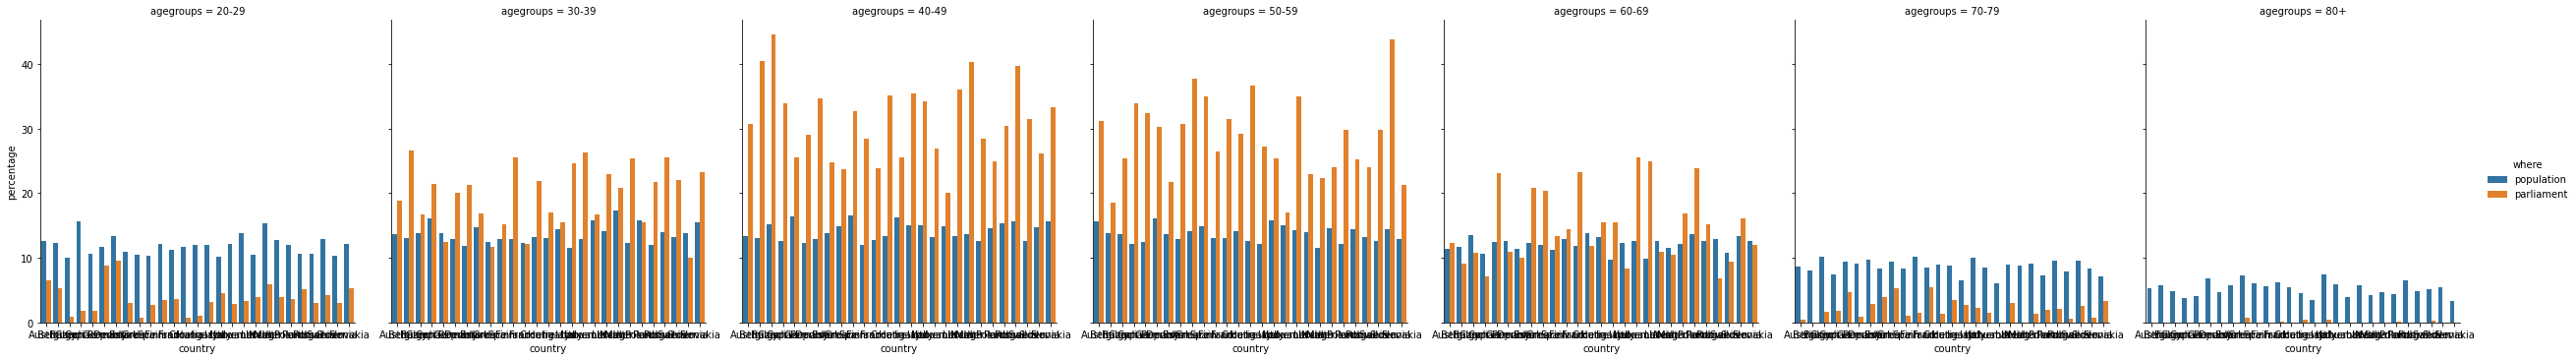

In [110]:
# Frist try to visualize the data
sns.catplot(data = agegroups_concat,
           x = 'country', 
            y = 'percentage', kind='bar', col= 'agegroups',
           hue='where')

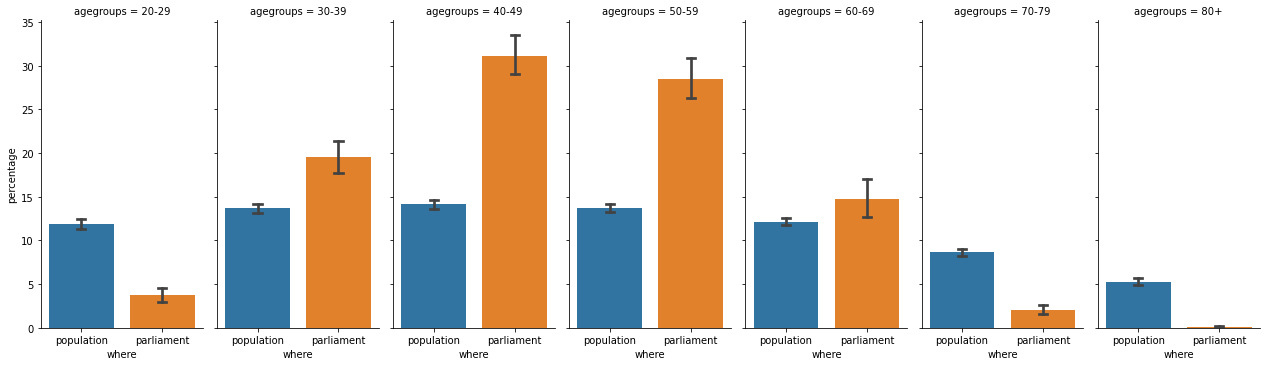

In [111]:
# Second try to visualize data, this time not by every single country but using the mean values
sns.catplot(data = agegroups_concat, x = 'where', 
                            y = 'percentage', kind ='bar', 
                            col = 'agegroups',
                            height = 5, aspect = 0.5, capsize =.1)

An overall trend is visible: Age groups 20-29, 70-79, and 80+ are underrepresented in parliaments, whereas agegroups 40-49 and 50-59 are overrepresented. However, this type of visualization is not ideal, so the mean for every age group has to be calculated.

This visualization should basically be displayed on one single graph.

## 1.6 Calculating the means of all age groups in the dataframes population and parliaments

In [112]:
# Population
agegroups_merged_2

,geo,country,20-29,30-39,40-49,50-59,60-69,70-79,80+,where
0,AT,Austria,12.573463,13.682993,13.334294,15.693506,11.414545,8.641652,5.325734,population
1,BE,Belgium,12.295599,13.013008,13.082550,13.813567,11.694684,8.022181,5.699852,population
2,BG,Bulgaria,9.958308,13.758045,15.181655,13.714414,13.502660,10.098048,4.866660,population
3,CY,Cyprus,15.633020,16.176823,12.534839,12.120878,10.665931,7.480701,3.775880,population
4,CZ,Czech Republic,10.612778,13.887539,16.483393,12.528003,12.441571,9.459592,4.124766,population
5,DE,Germany,11.642762,12.967845,12.243341,16.169378,12.633424,9.078771,6.831020,population
6,DK,Denmark,13.442089,11.795225,12.984351,13.746807,11.397441,9.692821,4.676921,population
7,EE,Estonia,10.890565,14.774684,13.754575,12.901136,12.282916,8.378029,5.827419,population
8,EL,Greece,10.489109,12.438540,14.922753,14.138758,12.050596,9.366534,7.214025,population
9,ES,Spain,10.346280,12.894536,16.550149,14.863331,11.304265,8.418094,6.023443,population


In [113]:
# Calculate the mean of every column
agegroups_merged_2_mean = agegroups_merged_2[['20-29','30-39','40-49','50-59','60-69','70-79','80+']].mean()

In [114]:
# Shows on average how much percent of the population falls into the different age groups
agegroups_merged_2_mean

20-29    11.859672
30-39    13.680113
40-49    14.138242
50-59    13.686445
60-69    12.153117
70-79     8.620779
80+       5.239222
dtype: float64

In [115]:
population_means = {'20-29':'11.859672',
'30-39':'13.680113',
'40-49':'14.138242',
'50-59':'13.686445',
'60-69':'12.153117',
'70-79':'8.620779',
'80+':'5.239222'}

In [116]:
# Transform the output/ dictonary into a dataframe
population_means = pd.DataFrame([population_means])

In [117]:
# New dataframe with all mean values
population_means

,20-29,30-39,40-49,50-59,60-69,70-79,80+
0,11.859672,13.680113,14.138242,13.686445,12.153117,8.620779,5.239222


In [118]:
# Declare a list that is to be converted into a column
pop = ['population']
 
# Use 'where' as the column name
population_means['where'] = pop

population_means

,20-29,30-39,40-49,50-59,60-69,70-79,80+,where
0,11.859672,13.680113,14.138242,13.686445,12.153117,8.620779,5.239222,population


In [119]:
population_means

,20-29,30-39,40-49,50-59,60-69,70-79,80+,where
0,11.859672,13.680113,14.138242,13.686445,12.153117,8.620779,5.239222,population


In [120]:
# Change population_means from widthform to longform for visualization
population_means_1 = population_means.melt(id_vars='where', value_name='percentage', var_name='agegroup')

In [121]:
# Dataframe in longform
population_means_1

,where,agegroup,percentage
0,population,20-29,11.859672
1,population,30-39,13.680113
2,population,40-49,14.138242
3,population,50-59,13.686445
4,population,60-69,12.153117
5,population,70-79,8.620779
6,population,80+,5.239222


In [122]:
# Check if it is a dataframe
type(population_means_1)

pandas.core.frame.DataFrame

Now the same will be done for the parliament dataframe: calculate the mean for all age groups in the parliaments and change it from widthform to longform for data visualization

In [123]:
# The dataframe parliament
agegroups_merged_3

,geo,country,20-29,30-39,40-49,50-59,60-69,70-79,80+,where
0,AT,Austria,6.557377,18.852459,30.737705,31.147541,12.295082,0.409836,0.000000,parliament
1,BE,Belgium,5.238095,26.666667,40.476190,18.571429,9.047619,0.000000,0.000000,parliament
2,BG,Bulgaria,0.833333,16.666667,44.583333,25.416667,10.833333,1.666667,0.000000,parliament
3,CY,Cyprus,1.785714,21.428571,33.928571,33.928571,7.142857,1.785714,0.000000,parliament
4,CZ,Czech Republic,1.779359,12.455516,25.622776,32.384342,23.131673,4.626335,0.000000,parliament
5,DE,Germany,8.831522,20.108696,29.076087,30.298913,10.869565,0.815217,0.000000,parliament
6,DK,Denmark,9.497207,21.229050,34.636872,21.787709,10.055866,2.793296,0.000000,parliament
7,EE,Estonia,2.970297,16.831683,24.752475,30.693069,20.792079,3.960396,0.000000,parliament
8,EL,Greece,0.666667,11.666667,23.666667,37.666667,20.333333,5.333333,0.666667,parliament
9,ES,Spain,2.764228,15.121951,32.682927,34.959350,13.333333,0.975610,0.000000,parliament


In [124]:
# Calculate the means for every age group in the parliaments
agegroups_merged_3_mean = agegroups_merged_3[['20-29','30-39','40-49','50-59','60-69','70-79','80+']].mean()

In [125]:
# Shows on average how much percent of the member of parliaments fall into the different agegroups
agegroups_merged_3_mean

20-29     3.778156
30-39    19.564760
40-49    31.145780
50-59    28.480631
60-69    14.790507
70-79     2.083921
80+       0.080111
dtype: float64

In [126]:
# Save the output as dictonary 
parliament_means = {'20-29':'3.761898',
'30-39':'19.949502',
'40-49':'32.144488',
'50-59':'28.059343',
'60-69':'13.953824',
'70-79':'1.974724',
'80+':'0.100815'}

In [127]:
# Change dict-object into dataframe
parliament_means = pd.DataFrame([parliament_means])

In [128]:
parliament_means

,20-29,30-39,40-49,50-59,60-69,70-79,80+
0,3.761898,19.949502,32.144488,28.059343,13.953824,1.974724,0.100815


In [129]:
# Declare a list that is to be converted into a column
par = ['parliament']
 
# Use 'where' as the column name
parliament_means['where'] = par
 
# check the result
parliament_means

,20-29,30-39,40-49,50-59,60-69,70-79,80+,where
0,3.761898,19.949502,32.144488,28.059343,13.953824,1.974724,0.100815,parliament


In [130]:
# Change the dataframe from widthform to longform
parliament_means_1 = parliament_means.melt(id_vars=['where'], value_name='percentage', var_name=['agegroup'])

In [131]:
# This dataframe shows, on average, how much percent of MPs falls into the different age groups
parliament_means_1

,where,agegroup,percentage
0,parliament,20-29,3.761898
1,parliament,30-39,19.949502
2,parliament,40-49,32.144488
3,parliament,50-59,28.059343
4,parliament,60-69,13.953824
5,parliament,70-79,1.974724
6,parliament,80+,0.100815


In [132]:
# This dataframe shows, on average, how much percent of the population falls into the different age groups
population_means_1

,where,agegroup,percentage
0,population,20-29,11.859672
1,population,30-39,13.680113
2,population,40-49,14.138242
3,population,50-59,13.686445
4,population,60-69,12.153117
5,population,70-79,8.620779
6,population,80+,5.239222


In [133]:
# Append the two dataframes
agegroups_mean_concat = pd.concat([population_means_1,parliament_means_1])

In [134]:
# Shows the two dataframes in longform
agegroups_mean_concat

,where,agegroup,percentage
0,population,20-29,11.859672
1,population,30-39,13.680113
2,population,40-49,14.138242
3,population,50-59,13.686445
4,population,60-69,12.153117
5,population,70-79,8.620779
6,population,80+,5.239222
0,parliament,20-29,3.761898
1,parliament,30-39,19.949502
2,parliament,40-49,32.144488


In [135]:
# Convert the values in column 'percentage' in float-variables
agegroups_mean_concat['percentage'] = agegroups_mean_concat['percentage'].astype('float')

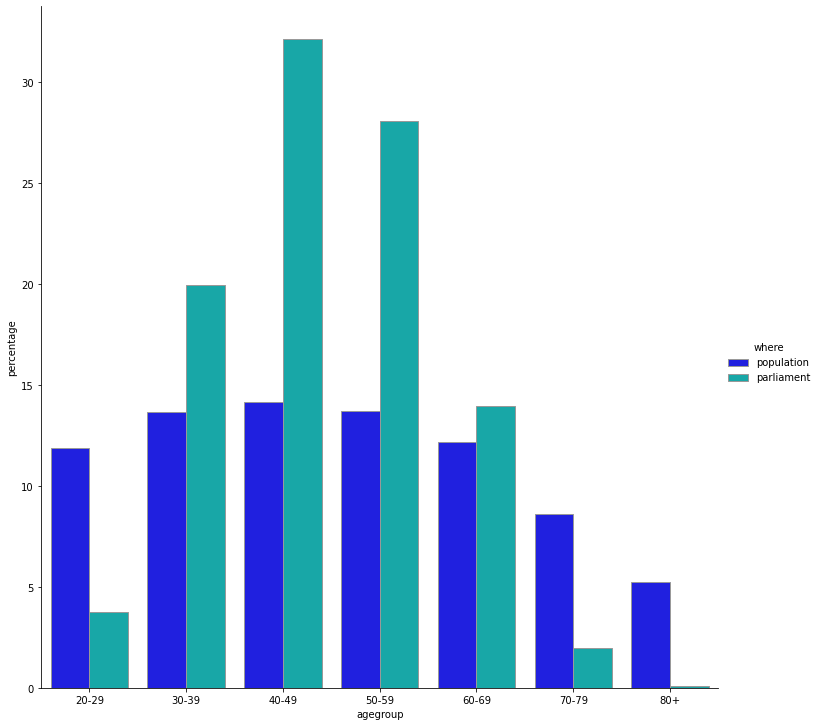

In [136]:
# Firt try of a visualization
catplot_means = sns.catplot(data = agegroups_mean_concat, x = 'agegroup', 
                            y = 'percentage', kind ='bar', hue='where', palette={"population": "b", "parliament": "c"}, edgecolor=".6",
                            height = 10, aspect = 1)

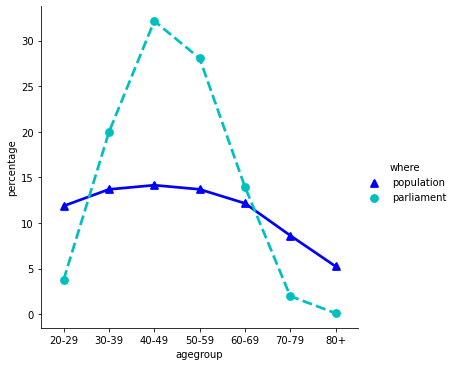

In [137]:
# Second try to visualize, this time as line graph
sns.catplot(x="agegroup", y="percentage", hue="where",
            palette= {"population": "b", "parliament": "c"},
            markers=["^", "o"], linestyles=["-", "--"], 
            kind="point", data=agegroups_mean_concat, height = 5, aspect = 1)

## 1.7 Visualization 1: What is the average proportion of each age group?

I want to use the line graph as shown in the cell above in my data story. However, I decided to use the tool Flourish to display the visualization because the sizes of the x- and y-axis can more easily be adjusted so that it fits the wordpress layout. Moreover, Flourish offers an option to link the data sources to the graph which I want to use for trustworthy and elegant reasons.

https://public.flourish.studio/visualisation/8109163/

Since the gap between the population and members of the parliaments in the age group of 20-29 is the biggest (this agegroup is underrepresented in the parliaments), I want to focus on that each group for further analyses.

In [138]:
# Create new dataframe that contains only the age group 20-29 of the parliament dataset
agegroups_parliament_1 = agegroups_parliament[agegroups_parliament["agegroups"] == '20-29']

In [139]:
# Display only the age group 20-29
agegroups_parliament_1

,country,where,agegroups,percentage
0,Austria,parliament,20-29,6.557377
1,Belgium,parliament,20-29,5.238095
2,Bulgaria,parliament,20-29,0.833333
3,Cyprus,parliament,20-29,1.785714
4,Czech Republic,parliament,20-29,1.779359
5,Germany,parliament,20-29,8.831522
6,Denmark,parliament,20-29,9.497207
7,Estonia,parliament,20-29,2.970297
8,Greece,parliament,20-29,0.666667
9,Spain,parliament,20-29,2.764228


In [140]:
# Create new dataframe that contains only the age group 20-29 of the population dataset
agegroups_population_1 = agegroups_population[agegroups_population["agegroups"] == '20-29']

In [141]:
# Display only the age group 20-29
agegroups_population_1

,country,where,agegroups,percentage
0,Austria,population,20-29,12.573463
1,Belgium,population,20-29,12.295599
2,Bulgaria,population,20-29,9.958308
3,Cyprus,population,20-29,15.633020
4,Czech Republic,population,20-29,10.612778
5,Germany,population,20-29,11.642762
6,Denmark,population,20-29,13.442089
7,Estonia,population,20-29,10.890565
8,Greece,population,20-29,10.489109
9,Spain,population,20-29,10.346280


In [142]:
# Sort the values in the column 'percentages' in descending order
agegroups_parliament_2 = agegroups_parliament_1.sort_values(by = 'percentage', ascending = False)

In [143]:
# Connect the two datasets
agegroups_concat_1 = pd.concat([agegroups_parliament_2, agegroups_population_1])

In [144]:
agegroups_concat_1

,country,where,agegroups,percentage
6,Denmark,parliament,20-29,9.497207
5,Germany,parliament,20-29,8.831522
0,Austria,parliament,20-29,6.557377
19,Malta,parliament,20-29,5.970149
26,Slovakia,parliament,20-29,5.333333
1,Belgium,parliament,20-29,5.238095
22,Portugal,parliament,20-29,5.217391
15,Italy,parliament,20-29,4.521556
24,Sweden,parliament,20-29,4.297994
20,Netherlands,parliament,20-29,4.000000


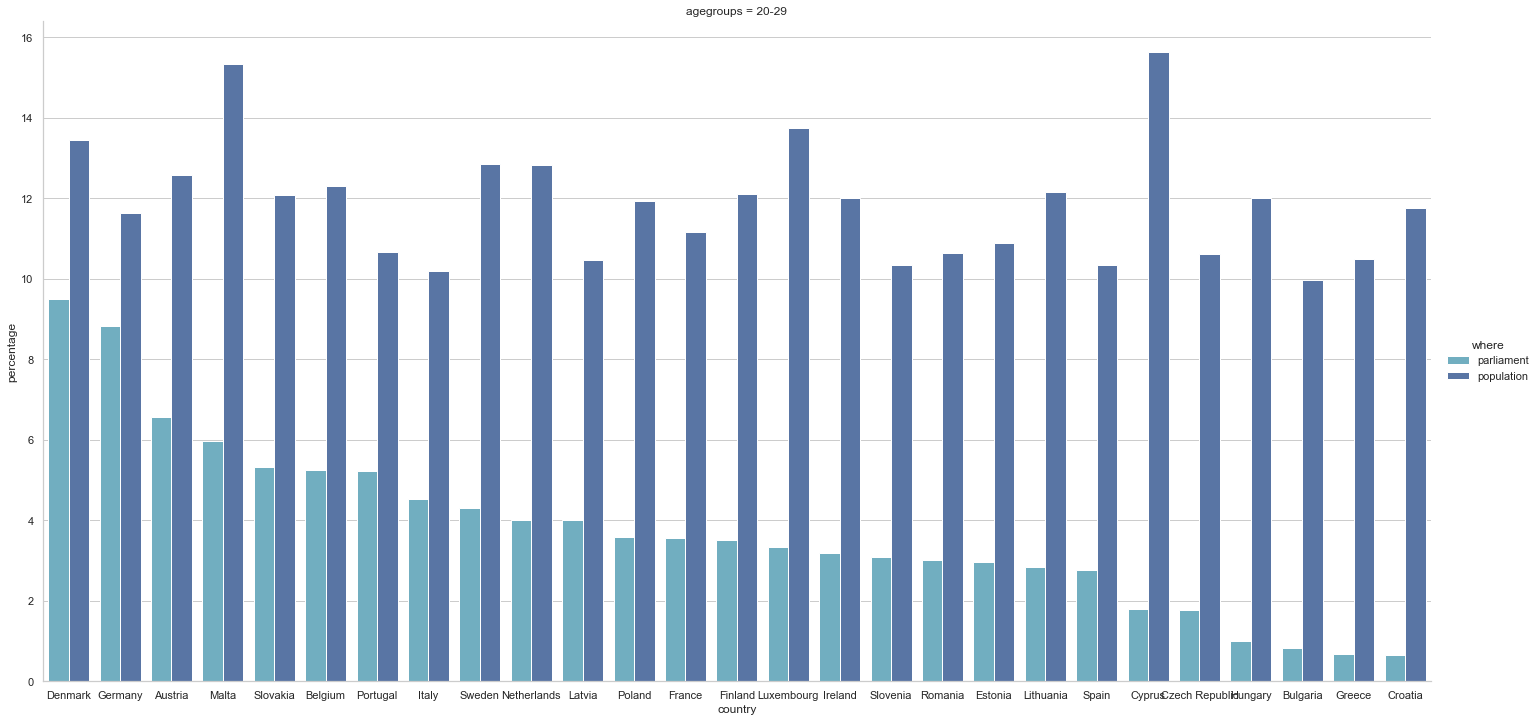

In [145]:
# visualization with the percentages in 'parliamet' in descending order
sns.set(style="whitegrid")
catplot_young = sns.catplot(data = agegroups_concat_1, x = 'country', 
                            y = 'percentage', kind ='bar', 
                            col = 'agegroups', hue='where', palette= {"population": "b", "parliament": "c"},
                            height = 10, aspect = 2)

When I look at this barchart I'm wondering: What are the 5 countries that represent this agegroup in the parliament best and what are the 5 countries that have the worst representation of this agegroup?

In [146]:
# Population dataframe
agegroups_merged_2

,geo,country,20-29,30-39,40-49,50-59,60-69,70-79,80+,where
0,AT,Austria,12.573463,13.682993,13.334294,15.693506,11.414545,8.641652,5.325734,population
1,BE,Belgium,12.295599,13.013008,13.082550,13.813567,11.694684,8.022181,5.699852,population
2,BG,Bulgaria,9.958308,13.758045,15.181655,13.714414,13.502660,10.098048,4.866660,population
3,CY,Cyprus,15.633020,16.176823,12.534839,12.120878,10.665931,7.480701,3.775880,population
4,CZ,Czech Republic,10.612778,13.887539,16.483393,12.528003,12.441571,9.459592,4.124766,population
5,DE,Germany,11.642762,12.967845,12.243341,16.169378,12.633424,9.078771,6.831020,population
6,DK,Denmark,13.442089,11.795225,12.984351,13.746807,11.397441,9.692821,4.676921,population
7,EE,Estonia,10.890565,14.774684,13.754575,12.901136,12.282916,8.378029,5.827419,population
8,EL,Greece,10.489109,12.438540,14.922753,14.138758,12.050596,9.366534,7.214025,population
9,ES,Spain,10.346280,12.894536,16.550149,14.863331,11.304265,8.418094,6.023443,population


In [147]:
# Parliament dataframe
agegroups_merged_3

,geo,country,20-29,30-39,40-49,50-59,60-69,70-79,80+,where
0,AT,Austria,6.557377,18.852459,30.737705,31.147541,12.295082,0.409836,0.000000,parliament
1,BE,Belgium,5.238095,26.666667,40.476190,18.571429,9.047619,0.000000,0.000000,parliament
2,BG,Bulgaria,0.833333,16.666667,44.583333,25.416667,10.833333,1.666667,0.000000,parliament
3,CY,Cyprus,1.785714,21.428571,33.928571,33.928571,7.142857,1.785714,0.000000,parliament
4,CZ,Czech Republic,1.779359,12.455516,25.622776,32.384342,23.131673,4.626335,0.000000,parliament
5,DE,Germany,8.831522,20.108696,29.076087,30.298913,10.869565,0.815217,0.000000,parliament
6,DK,Denmark,9.497207,21.229050,34.636872,21.787709,10.055866,2.793296,0.000000,parliament
7,EE,Estonia,2.970297,16.831683,24.752475,30.693069,20.792079,3.960396,0.000000,parliament
8,EL,Greece,0.666667,11.666667,23.666667,37.666667,20.333333,5.333333,0.666667,parliament
9,ES,Spain,2.764228,15.121951,32.682927,34.959350,13.333333,0.975610,0.000000,parliament


In [148]:
# Create a new column that stores the difference
new = (agegroups_merged_2['20-29'] - agegroups_merged_3['20-29'])
agegroups_merged_3['difference_young'] = new

In [149]:
# Display the dataframe
agegroups_merged_3

,geo,country,20-29,30-39,40-49,50-59,60-69,70-79,80+,where,difference_young
0,AT,Austria,6.557377,18.852459,30.737705,31.147541,12.295082,0.409836,0.000000,parliament,6.016086
1,BE,Belgium,5.238095,26.666667,40.476190,18.571429,9.047619,0.000000,0.000000,parliament,7.057504
2,BG,Bulgaria,0.833333,16.666667,44.583333,25.416667,10.833333,1.666667,0.000000,parliament,9.124975
3,CY,Cyprus,1.785714,21.428571,33.928571,33.928571,7.142857,1.785714,0.000000,parliament,13.847306
4,CZ,Czech Republic,1.779359,12.455516,25.622776,32.384342,23.131673,4.626335,0.000000,parliament,8.833419
5,DE,Germany,8.831522,20.108696,29.076087,30.298913,10.869565,0.815217,0.000000,parliament,2.811240
6,DK,Denmark,9.497207,21.229050,34.636872,21.787709,10.055866,2.793296,0.000000,parliament,3.944883
7,EE,Estonia,2.970297,16.831683,24.752475,30.693069,20.792079,3.960396,0.000000,parliament,7.920268
8,EL,Greece,0.666667,11.666667,23.666667,37.666667,20.333333,5.333333,0.666667,parliament,9.822443
9,ES,Spain,2.764228,15.121951,32.682927,34.959350,13.333333,0.975610,0.000000,parliament,7.582053


In [150]:
# Create a new dataframe that stores only the necessary columns
difference = agegroups_merged_3[['country', 'difference_young']]

In [151]:
# Show the data frame and sort values by descending order
difference.sort_values(by='difference_young', ascending=False)

,country,difference_young
3,Cyprus,13.847306
12,Croatia,11.087961
13,Hungary,10.991801
17,Luxembourg,10.420364
8,Greece,9.822443
19,Malta,9.378379
16,Lithuania,9.322214
2,Bulgaria,9.124975
4,Czech Republic,8.833419
20,Netherlands,8.830901


## Ranglist:

The 5 worst countries when it comes to representing the agegroup 20-29 proportionally to its population are:
1. Cyprus (difference of 13.85 percentage points)
2. Croatia (difference of 11.01 percentage points)
3. Hungary (difference of 10.99 percentage points)
4. Luxembourg (difference of 10.42 percentage points)
5. Greece (difference of 9.82 percentage points)

The 5 best countries when it  comes to representing the agegroup 20-29 proportionally to its population are:
1. Germany (difference of 2.81 percentage points)
2. Denmark (difference of 3.95 percentage points
3. Portugal (difference of 5.44 percentage points)
4. Italy (difference of 5.68 percentage points)
5. Austria (difference of 6.02 percentage points)

## 1.8 Visualization 2: What is the gap between the proportion of this age group in population compared to in parliament?

I want to use the dataframe 'difference' and the dataframe 'agegroups_concat_1' for visualization in my story. By that, I can sort the countries depending on the differences which immediately displays the ranglist within the graph too. For this, I'm leaving the Jupyter Notebook and use Flourish. I copied and pasted the dataframes into the following excel sheet: agegroup_young_vis.xlsx and uploaded it to Flourish.

Flourish comes in very handy in that case to display in elegant way further information about the different ranges of age groups within the two datasets parliament and population which makes the calculations more transparent and trustworthy.

https://public.flourish.studio/visualisation/8109471/

# 2. To what extent do national parliaments in the EU represent their national citizens in terms of gender?
## 2.1 Third dataset about gender (females) in EU countries

I downloaded the dataset from the following website: https://ec.europa.eu/eurostat/databrowser/view/demo_pjangroup/default/table?lang=en

Starting with EU_agegroups_female, later males will follow.

I want to access the age distribution because I want to exclude females (males) younger than 20 since members of parliaments are always 18 years old or older. Therefore, MPs cannot represent the parts of the population younger than 18/20 in terms of gender.

Otherwise, I think a comparions of gender including children as well would be missleading.

In [152]:
# Read the dataset of the female proportion in the population
EU_agegroups_female = pd.read_csv('EU_2020_agegroups_female.csv')

In [153]:
EU_agegroups_female

,DATAFLOW,LAST UPDATE,freq,unit,sex,age,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,F,TOTAL,AL,2020,1425342.0,NaN
1,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,F,TOTAL,AM,2020,1562689.0,NaN
2,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,F,TOTAL,AT,2020,4522292.0,NaN
3,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,F,TOTAL,AZ,2020,5039100.0,NaN
4,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,F,TOTAL,BE,2020,5841215.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1008,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,F,Y_LT5,SI,2020,48857.0,NaN
1009,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,F,Y_LT5,SK,2020,143215.0,NaN
1010,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,F,Y_LT5,TR,2020,3090417.0,NaN
1011,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,F,Y_LT5,UA,2020,873731.0,NaN


In [154]:
# Drop columns that are not needed
EU_agegroups_female.drop(['DATAFLOW','LAST UPDATE', 'freq',
                          'unit', 'TIME_PERIOD', 'sex', 'OBS_FLAG'], axis = 1, inplace = True)

In [155]:
EU_agegroups_female

,age,geo,OBS_VALUE
0,TOTAL,AL,1425342.0
1,TOTAL,AM,1562689.0
2,TOTAL,AT,4522292.0
3,TOTAL,AZ,5039100.0
4,TOTAL,BE,5841215.0
...,...,...,...
1008,Y_LT5,SI,48857.0
1009,Y_LT5,SK,143215.0
1010,Y_LT5,TR,3090417.0
1011,Y_LT5,UA,873731.0


In [156]:
# Create a list to only keep EU countries within the dataframe
my_list = ['BE', 'BG', 'CZ', 
           'DK', 'DE', 'EE', 
           'IE', 'EL', 'ES', 
           'FR', 'HR', 'IT', 
           'CY', 'LV', 'LT', 
           'LU', 'HU', 'MT', 
           'NL', 'AT', 'PL', 
           'PT', 'RO', 'SI', 
           'SK', 'FI', 'SE']
EU_agegroups_female_1 = EU_agegroups_female[EU_agegroups_female['geo'].isin(my_list)]

In [157]:
EU_agegroups_female_1

,age,geo,OBS_VALUE
2,TOTAL,AT,4522292.0
4,TOTAL,BE,5841215.0
5,TOTAL,BG,3581836.0
7,TOTAL,CY,453534.0
8,TOTAL,CZ,5421943.0
...,...,...,...
1004,Y_LT5,PT,213425.0
1005,Y_LT5,RO,487687.0
1007,Y_LT5,SE,292151.0
1008,Y_LT5,SI,48857.0


In [158]:
# Change dataframe from widthform to longform
EU_agegroups_female_2 = EU_agegroups_female_1.pivot(index = 'geo', columns = 'age', values = ['OBS_VALUE'])

In [159]:
EU_agegroups_female_2

OBS_VALUE                                                              \
age       TOTAL  UNK     Y10-14     Y15-19     Y20-24     Y25-29     Y30-34   
geo                                                                           
AT    4522292.0  0.0   205617.0   212297.0   251570.0   293260.0   298547.0   
BE    5841215.0  0.0   326237.0   309652.0   329676.0   369726.0   373486.0   
BG    3581836.0  0.0   166367.0   151806.0   146424.0   189909.0   231707.0   
CY     453534.0  0.0    22726.0    24651.0    33289.0    38757.0    37796.0   
CZ    5421943.0  0.0   282023.0   232007.0   234796.0   316086.0   349803.0   
DE   42129098.0  0.0  1797762.0  1900397.0  2191934.0  2438489.0  2665455.0   
DK    2925845.0  0.0   164885.0   167639.0   186937.0   196402.0   175511.0   
EE     699699.0  0.0    36283.0    30701.0    30694.0    38958.0    47901.0   
EL    5503077.0  0.0   268819.0   262338.0   266429.0   274065.0   298181.0   
ES   24133301.0  0.0  1226655.0  1159214.0  1148342.0  1257568.0  1391722.0   
FI    2797030.0  0.0   151113.0   144441.0   152265.0   172593.0   169653.0   
FR   34787547.0  0.0  2064858.0  2029508.0  1860407.0  1893857.0  2099471.0   
HR    2086515.0  0.0    98575.0    96360.0   114522.0   114746.0   123938.0   
HU    5088736.0  0.0   241937.0   236888.0   261856.0   304796.0   299259.0   
IE    2506783.0  0.0   169771.0   158994.0   150498.0   144130.0   167573.0   
IT   30591392.0  0.0  1374611.0  1385591.0  1406868.0  1523050.0  1623692.0   
LT    1489736.0  0.0    64833.0    63788.0    74291.0    87979.0    88432.0   
LU     311144.0  0.0    16063.0    16096.0    18802.0    23089.0    24527.0   
LV    1026719.0  0.0    50189.0    43651.0    40196.0    55842.0    66589.0   
MT     248802.0  0.0    10532.0    10800.0    14925.0    21157.0    21229.0   
NL    8759554.0  0.0   464854.0   512930.0   538920.0   560366.0   545437.0   
PL   19584757.0  0.0   974338.0   870611.0   988115.0  1229908.0  1407779.0   
PT    5435932.0  0.0   247182.0   266770.0   271585.0   274604.0   287895.0   
RO    9868177.0  0.0   516387.0   495699.0   488086.0   505790.0   658652.0   
SE    5131775.0  0.0   295667.0   272837.0   277075.0   359711.0   348710.0   
SI    1044795.0  0.0    50864.0    45339.0    47875.0    53130.0    63626.0   
SK    2792523.0  0.0   135780.0   127805.0   142469.0   179921.0   201459.0   

                                      ...                                   \
age     Y35-39     Y40-44     Y45-49  ...     Y55-59     Y60-64     Y65-69   
geo                                   ...                                    
AT    302843.0   281274.0   313946.0  ...   343335.0   289698.0   237161.0   
BE    375612.0   366609.0   379784.0  ...   399077.0   367037.0   321281.0   
BG    231040.0   258606.0   254785.0  ...   240710.0   251894.0   258560.0   
CY     34657.0    30090.0    27062.0  ...    27617.0    25233.0    23116.0   
CZ    368149.0   448510.0   408110.0  ...   325425.0   335147.0   363248.0   
DE   2606089.0  2438092.0  2624418.0  ...  3366915.0  2868318.0  2546505.0   
DK    162485.0   181674.0   195744.0  ...   193719.0   173710.0   163541.0   
EE     45758.0    44080.0    45307.0  ...    46041.0    47345.0    45393.0   
EL    367204.0   402081.0   408394.0  ...   379760.0   362278.0   323057.0   
ES   1669074.0  1962293.0  1922352.0  ...  1710033.0  1502138.0  1271580.0   
FI    174660.0   168547.0   154391.0  ...   185152.0   183336.0   185685.0   
FR   2181243.0  2074292.0  2286345.0  ...  2246788.0  2148515.0  2067425.0   
HR    136636.0   136137.0   131699.0  ...   149408.0   154559.0   142394.0   
HU    320647.0   412894.0   371544.0  ...   298549.0   355746.0   366614.0   
IE    201474.0   197688.0   179787.0  ...   147685.0   130104.0   112834.0   
IT   1779210.0  2098266.0  2392965.0  ...  2324483.0  2018428.0  1818274.0   
LT     81835.0    86272.0    99577.0  ...   117275.0   111058.0    92402.0   
LU     24385.0    23277.0    22509.0  ...    20512.0    16990.0    13913.0 

In [160]:
# Check the columns names
EU_agegroups_female_2.columns

MultiIndex([('OBS_VALUE',  'TOTAL'),
            ('OBS_VALUE',    'UNK'),
            ('OBS_VALUE', 'Y10-14'),
            ('OBS_VALUE', 'Y15-19'),
            ('OBS_VALUE', 'Y20-24'),
            ('OBS_VALUE', 'Y25-29'),
            ('OBS_VALUE', 'Y30-34'),
            ('OBS_VALUE', 'Y35-39'),
            ('OBS_VALUE', 'Y40-44'),
            ('OBS_VALUE', 'Y45-49'),
            ('OBS_VALUE',   'Y5-9'),
            ('OBS_VALUE', 'Y50-54'),
            ('OBS_VALUE', 'Y55-59'),
            ('OBS_VALUE', 'Y60-64'),
            ('OBS_VALUE', 'Y65-69'),
            ('OBS_VALUE', 'Y70-74'),
            ('OBS_VALUE', 'Y75-79'),
            ('OBS_VALUE', 'Y80-84'),
            ('OBS_VALUE', 'Y_GE75'),
            ('OBS_VALUE', 'Y_GE80'),
            ('OBS_VALUE', 'Y_GE85'),
            ('OBS_VALUE',  'Y_LT5')],
           names=[None, 'age'])

In [161]:
# Drop columns that are not needed
EU_agegroups_female_2.drop([('OBS_VALUE',    'UNK'),
                          ('OBS_VALUE', 'Y80-84'),
                          ('OBS_VALUE', 'Y_GE75'),
                          ('OBS_VALUE', 'Y_GE85')], axis = 1, inplace = True)

In [162]:
EU_agegroups_female_2

OBS_VALUE                                                         \
age       TOTAL     Y10-14     Y15-19     Y20-24     Y25-29     Y30-34   
geo                                                                      
AT    4522292.0   205617.0   212297.0   251570.0   293260.0   298547.0   
BE    5841215.0   326237.0   309652.0   329676.0   369726.0   373486.0   
BG    3581836.0   166367.0   151806.0   146424.0   189909.0   231707.0   
CY     453534.0    22726.0    24651.0    33289.0    38757.0    37796.0   
CZ    5421943.0   282023.0   232007.0   234796.0   316086.0   349803.0   
DE   42129098.0  1797762.0  1900397.0  2191934.0  2438489.0  2665455.0   
DK    2925845.0   164885.0   167639.0   186937.0   196402.0   175511.0   
EE     699699.0    36283.0    30701.0    30694.0    38958.0    47901.0   
EL    5503077.0   268819.0   262338.0   266429.0   274065.0   298181.0   
ES   24133301.0  1226655.0  1159214.0  1148342.0  1257568.0  1391722.0   
FI    2797030.0   151113.0   144441.0   152265.0   172593.0   169653.0   
FR   34787547.0  2064858.0  2029508.0  1860407.0  1893857.0  2099471.0   
HR    2086515.0    98575.0    96360.0   114522.0   114746.0   123938.0   
HU    5088736.0   241937.0   236888.0   261856.0   304796.0   299259.0   
IE    2506783.0   169771.0   158994.0   150498.0   144130.0   167573.0   
IT   30591392.0  1374611.0  1385591.0  1406868.0  1523050.0  1623692.0   
LT    1489736.0    64833.0    63788.0    74291.0    87979.0    88432.0   
LU     311144.0    16063.0    16096.0    18802.0    23089.0    24527.0   
LV    1026719.0    50189.0    43651.0    40196.0    55842.0    66589.0   
MT     248802.0    10532.0    10800.0    14925.0    21157.0    21229.0   
NL    8759554.0   464854.0   512930.0   538920.0   560366.0   545437.0   
PL   19584757.0   974338.0   870611.0   988115.0  1229908.0  1407779.0   
PT    5435932.0   247182.0   266770.0   271585.0   274604.0   287895.0   
RO    9868177.0   516387.0   495699.0   488086.0   505790.0   658652.0   
SE    5131775.0   295667.0   272837.0   277075.0   359711.0   348710.0   
SI    1044795.0    50864.0    45339.0    47875.0    53130.0    63626.0   
SK    2792523.0   135780.0   127805.0   142469.0   179921.0   201459.0   

                                                                       \
age     Y35-39     Y40-44     Y45-49       Y5-9     Y50-54     Y55-59   
geo                                                                     
AT    302843.0   281274.0   313946.0   206018.0   354457.0   343335.0   
BE    375612.0   366609.0   379784.0   324512.0   390613.0   399077.0   
BG    231040.0   258606.0   254785.0   164973.0   237633.0   240710.0   
CY     34657.0    30090.0    27062.0    23857.0    26641.0    27617.0   
CZ    368149.0   448510.0   408110.0   274583.0   336357.0   325425.0   
DE   2606089.0  2438092.0  2624418.0  1812127.0  3326464.0  3366915.0   
DK    162485.0   181674.0   195744.0   149474.0   204373.0   193719.0   
EE     45758.0    44080.0    45307.0    35512.0    42693.0    46041.0   
EL    367204.0   402081.0   408394.0   248904.0   413336.0   379760.0   
ES   1669074.0  1962293.0  1922352.0  1128792.0  1837771.0  1710033.0   
FI    174660.0   168547.0   154391.0   149633.0   176612.0   185152.0   
FR   2181243.0  2074292.0  2286345.0  2017948.0  2256289.0  2246788.0   
HR    136636.0   136137.0   131699.0    95195.0   141543.0   149408.0   
HU    320647.0   412894.0   371544.0   221892.0   334214.0   298549.0   
IE    201474.0   197688.0   179787.0   169101.0   158012.0   147685.0   
IT   1779210.0  2098266.0  2392965.0  1275716.0  2472560.0  2324483.0   
LT     81835.0    86272.0    99577.0    70466.0   105295.0   117275.0   
LU     24385.0    23277.0    22509.0    16544.0    22505.0    20512.0   
LV     63832.0    62662.0    67749.0    48146.0    67059.0    75104.0   
MT     19222.0    17462.0    15090.0    11228.0    13518.0    15015.0   
NL    520631.0   512586.0   595627.0   444554.0   637772.0   623909.0   
PL   1544475.0  1464473.0  127117

In [163]:
# Change multi index into a single index by dropping a level
EU_agegroups_female_2.columns = EU_agegroups_female_2.columns.droplevel()

In [164]:
EU_agegroups_female_2

age,TOTAL,Y10-14,Y15-19,Y20-24,Y25-29,Y30-34,Y35-39,Y40-44,Y45-49,Y5-9,Y50-54,Y55-59,Y60-64,Y65-69,Y70-74,Y75-79,Y_GE80,Y_LT5
geo,,,,,,,,,,,,,,,,,,
AT,4522292.0,205617.0,212297.0,251570.0,293260.0,298547.0,302843.0,281274.0,313946.0,206018.0,354457.0,343335.0,289698.0,237161.0,211723.0,211808.0,296999.0,211739.0
BE,5841215.0,326237.0,309652.0,329676.0,369726.0,373486.0,375612.0,366609.0,379784.0,324512.0,390613.0,399077.0,367037.0,321281.0,289133.0,208014.0,412538.0,298228.0
BG,3581836.0,166367.0,151806.0,146424.0,189909.0,231707.0,231040.0,258606.0,254785.0,164973.0,237633.0,240710.0,251894.0,258560.0,245516.0,174602.0,221536.0,155768.0
CY,453534.0,22726.0,24651.0,33289.0,38757.0,37796.0,34657.0,30090.0,27062.0,23857.0,26641.0,27617.0,25233.0,23116.0,20521.0,15007.0,19441.0,23073.0
CZ,5421943.0,282023.0,232007.0,234796.0,316086.0,349803.0,368149.0,448510.0,408110.0,274583.0,336357.0,325425.0,335147.0,363248.0,337451.0,241039.0,291915.0,277294.0
DE,42129098.0,1797762.0,1900397.0,2191934.0,2438489.0,2665455.0,2606089.0,2438092.0,2624418.0,1812127.0,3326464.0,3366915.0,2868318.0,2546505.0,1955815.0,2143390.0,3517261.0,1929667.0
DK,2925845.0,164885.0,167639.0,186937.0,196402.0,175511.0,162485.0,181674.0,195744.0,149474.0,204373.0,193719.0,173710.0,163541.0,168091.0,128223.0,163835.0,149602.0
EE,699699.0,36283.0,30701.0,30694.0,38958.0,47901.0,45758.0,44080.0,45307.0,35512.0,42693.0,46041.0,47345.0,45393.0,38893.0,32226.0,57456.0,34458.0
EL,5503077.0,268819.0,262338.0,266429.0,274065.0,298181.0,367204.0,402081.0,408394.0,248904.0,413336.0,379760.0,362278.0,323057.0,307835.0,240669.0,454928.0,224799.0


In [165]:
# Sum up the age groups that refer to under 20 years old
sum_column_10 = EU_agegroups_female_2['Y_LT5']+ EU_agegroups_female_2['Y5-9'] + EU_agegroups_female_2['Y10-14'] + EU_agegroups_female_2['Y15-19'] 
EU_agegroups_female_2["f_LT19"] = sum_column_10

In [166]:
EU_agegroups_female_2

age,TOTAL,Y10-14,Y15-19,Y20-24,Y25-29,Y30-34,Y35-39,Y40-44,Y45-49,Y5-9,Y50-54,Y55-59,Y60-64,Y65-69,Y70-74,Y75-79,Y_GE80,Y_LT5,f_LT19
geo,,,,,,,,,,,,,,,,,,,
AT,4522292.0,205617.0,212297.0,251570.0,293260.0,298547.0,302843.0,281274.0,313946.0,206018.0,354457.0,343335.0,289698.0,237161.0,211723.0,211808.0,296999.0,211739.0,835671.0
BE,5841215.0,326237.0,309652.0,329676.0,369726.0,373486.0,375612.0,366609.0,379784.0,324512.0,390613.0,399077.0,367037.0,321281.0,289133.0,208014.0,412538.0,298228.0,1258629.0
BG,3581836.0,166367.0,151806.0,146424.0,189909.0,231707.0,231040.0,258606.0,254785.0,164973.0,237633.0,240710.0,251894.0,258560.0,245516.0,174602.0,221536.0,155768.0,638914.0
CY,453534.0,22726.0,24651.0,33289.0,38757.0,37796.0,34657.0,30090.0,27062.0,23857.0,26641.0,27617.0,25233.0,23116.0,20521.0,15007.0,19441.0,23073.0,94307.0
CZ,5421943.0,282023.0,232007.0,234796.0,316086.0,349803.0,368149.0,448510.0,408110.0,274583.0,336357.0,325425.0,335147.0,363248.0,337451.0,241039.0,291915.0,277294.0,1065907.0
DE,42129098.0,1797762.0,1900397.0,2191934.0,2438489.0,2665455.0,2606089.0,2438092.0,2624418.0,1812127.0,3326464.0,3366915.0,2868318.0,2546505.0,1955815.0,2143390.0,3517261.0,1929667.0,7439953.0
DK,2925845.0,164885.0,167639.0,186937.0,196402.0,175511.0,162485.0,181674.0,195744.0,149474.0,204373.0,193719.0,173710.0,163541.0,168091.0,128223.0,163835.0,149602.0,631600.0
EE,699699.0,36283.0,30701.0,30694.0,38958.0,47901.0,45758.0,44080.0,45307.0,35512.0,42693.0,46041.0,47345.0,45393.0,38893.0,32226.0,57456.0,34458.0,136954.0
EL,5503077.0,268819.0,262338.0,266429.0,274065.0,298181.0,367204.0,402081.0,408394.0,248904.0,413336.0,379760.0,362278.0,323057.0,307835.0,240669.0,454928.0,224799.0,1004860.0


In [167]:
# Now drop the columns that are not needed because they are summed up
EU_agegroups_female_2.drop(['Y_LT5', 'Y5-9', 'Y10-14', 'Y15-19'], axis = 1, inplace = True)

In [168]:
EU_agegroups_female_2

age,TOTAL,Y20-24,Y25-29,Y30-34,Y35-39,Y40-44,Y45-49,Y50-54,Y55-59,Y60-64,Y65-69,Y70-74,Y75-79,Y_GE80,f_LT19
geo,,,,,,,,,,,,,,,
AT,4522292.0,251570.0,293260.0,298547.0,302843.0,281274.0,313946.0,354457.0,343335.0,289698.0,237161.0,211723.0,211808.0,296999.0,835671.0
BE,5841215.0,329676.0,369726.0,373486.0,375612.0,366609.0,379784.0,390613.0,399077.0,367037.0,321281.0,289133.0,208014.0,412538.0,1258629.0
BG,3581836.0,146424.0,189909.0,231707.0,231040.0,258606.0,254785.0,237633.0,240710.0,251894.0,258560.0,245516.0,174602.0,221536.0,638914.0
CY,453534.0,33289.0,38757.0,37796.0,34657.0,30090.0,27062.0,26641.0,27617.0,25233.0,23116.0,20521.0,15007.0,19441.0,94307.0
CZ,5421943.0,234796.0,316086.0,349803.0,368149.0,448510.0,408110.0,336357.0,325425.0,335147.0,363248.0,337451.0,241039.0,291915.0,1065907.0
DE,42129098.0,2191934.0,2438489.0,2665455.0,2606089.0,2438092.0,2624418.0,3326464.0,3366915.0,2868318.0,2546505.0,1955815.0,2143390.0,3517261.0,7439953.0
DK,2925845.0,186937.0,196402.0,175511.0,162485.0,181674.0,195744.0,204373.0,193719.0,173710.0,163541.0,168091.0,128223.0,163835.0,631600.0
EE,699699.0,30694.0,38958.0,47901.0,45758.0,44080.0,45307.0,42693.0,46041.0,47345.0,45393.0,38893.0,32226.0,57456.0,136954.0
EL,5503077.0,266429.0,274065.0,298181.0,367204.0,402081.0,408394.0,413336.0,379760.0,362278.0,323057.0,307835.0,240669.0,454928.0,1004860.0


In [169]:
# Now sum up all columns that refer to the age group older than 20 years
sum_column_11 = EU_agegroups_female_2['Y20-24']+ EU_agegroups_female_2['Y25-29'] + EU_agegroups_female_2['Y30-34'] + EU_agegroups_female_2['Y35-39'] + EU_agegroups_female_2['Y40-44'] + EU_agegroups_female_2['Y45-49'] + EU_agegroups_female_2['Y50-54'] + EU_agegroups_female_2['Y55-59'] +  EU_agegroups_female_2['Y60-64'] +  EU_agegroups_female_2['Y65-69'] +  EU_agegroups_female_2['Y70-74'] +  EU_agegroups_female_2['Y75-79'] +  EU_agegroups_female_2['Y_GE80'] 
EU_agegroups_female_2["f_GE20"] = sum_column_11

In [170]:
EU_agegroups_female_2

age,TOTAL,Y20-24,Y25-29,Y30-34,Y35-39,Y40-44,Y45-49,Y50-54,Y55-59,Y60-64,Y65-69,Y70-74,Y75-79,Y_GE80,f_LT19,f_GE20
geo,,,,,,,,,,,,,,,,
AT,4522292.0,251570.0,293260.0,298547.0,302843.0,281274.0,313946.0,354457.0,343335.0,289698.0,237161.0,211723.0,211808.0,296999.0,835671.0,3686621.0
BE,5841215.0,329676.0,369726.0,373486.0,375612.0,366609.0,379784.0,390613.0,399077.0,367037.0,321281.0,289133.0,208014.0,412538.0,1258629.0,4582586.0
BG,3581836.0,146424.0,189909.0,231707.0,231040.0,258606.0,254785.0,237633.0,240710.0,251894.0,258560.0,245516.0,174602.0,221536.0,638914.0,2942922.0
CY,453534.0,33289.0,38757.0,37796.0,34657.0,30090.0,27062.0,26641.0,27617.0,25233.0,23116.0,20521.0,15007.0,19441.0,94307.0,359227.0
CZ,5421943.0,234796.0,316086.0,349803.0,368149.0,448510.0,408110.0,336357.0,325425.0,335147.0,363248.0,337451.0,241039.0,291915.0,1065907.0,4356036.0
DE,42129098.0,2191934.0,2438489.0,2665455.0,2606089.0,2438092.0,2624418.0,3326464.0,3366915.0,2868318.0,2546505.0,1955815.0,2143390.0,3517261.0,7439953.0,34689145.0
DK,2925845.0,186937.0,196402.0,175511.0,162485.0,181674.0,195744.0,204373.0,193719.0,173710.0,163541.0,168091.0,128223.0,163835.0,631600.0,2294245.0
EE,699699.0,30694.0,38958.0,47901.0,45758.0,44080.0,45307.0,42693.0,46041.0,47345.0,45393.0,38893.0,32226.0,57456.0,136954.0,562745.0
EL,5503077.0,266429.0,274065.0,298181.0,367204.0,402081.0,408394.0,413336.0,379760.0,362278.0,323057.0,307835.0,240669.0,454928.0,1004860.0,4498217.0


In [171]:
# Again drop the columns that are summarized
EU_agegroups_female_2.drop(['Y20-24', 'Y25-29', 'Y30-34', 'Y35-39', 'Y40-44', 'Y45-49', 'Y50-54', 'Y55-59', 'Y60-64', 'Y65-69', 'Y70-74', 'Y75-79', 'Y_GE80'], axis = 1, inplace = True)

In [172]:
# This dataframe shows the total number of women, the number of women under 20 years old, and older than 20 years
EU_agegroups_female_2

age,TOTAL,f_LT19,f_GE20
geo,,,
AT,4522292.0,835671.0,3686621.0
BE,5841215.0,1258629.0,4582586.0
BG,3581836.0,638914.0,2942922.0
CY,453534.0,94307.0,359227.0
CZ,5421943.0,1065907.0,4356036.0
DE,42129098.0,7439953.0,34689145.0
DK,2925845.0,631600.0,2294245.0
EE,699699.0,136954.0,562745.0
EL,5503077.0,1004860.0,4498217.0


In [173]:
# Reset the index to be able to use the map-function on geo
EU_agegroups_female_2.reset_index(level=0, inplace=True)

In [174]:
# Add the column 'countries' that contains the countries' names.
EU_agegroups_female_2['country'] = EU_agegroups_female_2['geo'].map(EU_countries)

In [175]:
EU_agegroups_female_2

age,geo,TOTAL,f_LT19,f_GE20,country
0,AT,4522292.0,835671.0,3686621.0,Austria
1,BE,5841215.0,1258629.0,4582586.0,Belgium
2,BG,3581836.0,638914.0,2942922.0,Bulgaria
3,CY,453534.0,94307.0,359227.0,Cyprus
4,CZ,5421943.0,1065907.0,4356036.0,Czech Republic
5,DE,42129098.0,7439953.0,34689145.0,Germany
6,DK,2925845.0,631600.0,2294245.0,Denmark
7,EE,699699.0,136954.0,562745.0,Estonia
8,EL,5503077.0,1004860.0,4498217.0,Greece
9,ES,24133301.0,4491664.0,19641637.0,Spain


In [176]:
# Rename a column
EU_agegroups_female_2 = EU_agegroups_female_2.rename(columns = {'TOTAL':'f_total'})#

In [177]:
# This is the final dataframe of women
EU_agegroups_female_2

age,geo,f_total,f_LT19,f_GE20,country
0,AT,4522292.0,835671.0,3686621.0,Austria
1,BE,5841215.0,1258629.0,4582586.0,Belgium
2,BG,3581836.0,638914.0,2942922.0,Bulgaria
3,CY,453534.0,94307.0,359227.0,Cyprus
4,CZ,5421943.0,1065907.0,4356036.0,Czech Republic
5,DE,42129098.0,7439953.0,34689145.0,Germany
6,DK,2925845.0,631600.0,2294245.0,Denmark
7,EE,699699.0,136954.0,562745.0,Estonia
8,EL,5503077.0,1004860.0,4498217.0,Greece
9,ES,24133301.0,4491664.0,19641637.0,Spain


## 2.2 Fourth dataset about gender (males) in EU countries

In [178]:
# Read the dataset that contains the number of men
EU_agegroups_male = pd.read_csv('EU_2020_agegroups_male.csv')

In [179]:
EU_agegroups_male

,DATAFLOW,LAST UPDATE,freq,unit,sex,age,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,M,TOTAL,AL,2020,1420613.0,NaN
1,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,M,TOTAL,AM,2020,1397005.0,NaN
2,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,M,TOTAL,AT,2020,4378772.0,NaN
3,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,M,TOTAL,AZ,2020,5028008.0,NaN
4,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,M,TOTAL,BE,2020,5681225.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1008,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,M,Y_LT5,SI,2020,51930.0,NaN
1009,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,M,Y_LT5,SK,2020,150913.0,NaN
1010,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,M,Y_LT5,TR,2020,3254719.0,NaN
1011,ESTAT:DEMO_PJANGROUP(1.0),05/07/21 23:00:00,A,NR,M,Y_LT5,UA,2020,931905.0,NaN


In [180]:
# Drop columns
EU_agegroups_male.drop(['DATAFLOW','LAST UPDATE', 'freq',
                          'unit', 'TIME_PERIOD', 'sex', 'OBS_FLAG'], axis = 1, inplace = True)

In [181]:
my_list = ['BE', 'BG', 'CZ', 
           'DK', 'DE', 'EE', 
           'IE', 'EL', 'ES', 
           'FR', 'HR', 'IT', 
           'CY', 'LV', 'LT', 
           'LU', 'HU', 'MT', 
           'NL', 'AT', 'PL', 
           'PT', 'RO', 'SI', 
           'SK', 'FI', 'SE']
EU_agegroups_male_1 = EU_agegroups_male[EU_agegroups_male['geo'].isin(my_list)]

In [182]:
EU_agegroups_male_1

,age,geo,OBS_VALUE
2,TOTAL,AT,4378772.0
4,TOTAL,BE,5681225.0
5,TOTAL,BG,3369646.0
7,TOTAL,CY,434471.0
8,TOTAL,CZ,5271996.0
...,...,...,...
1004,Y_LT5,PT,222777.0
1005,Y_LT5,RO,514834.0
1007,Y_LT5,SE,309567.0
1008,Y_LT5,SI,51930.0


In [183]:
EU_agegroups_male_2 = EU_agegroups_male_1.pivot(index = 'geo', columns = 'age', values = ['OBS_VALUE'])

In [184]:
EU_agegroups_male_2

OBS_VALUE                                                              \
age       TOTAL  UNK     Y10-14     Y15-19     Y20-24     Y25-29     Y30-34   
geo                                                                           
AT    4378772.0  0.0   216381.0   225558.0   266200.0   308142.0   309081.0   
BE    5681225.0  0.0   342132.0   326790.0   342641.0   374710.0   374051.0   
BG    3369646.0  0.0   175851.0   161171.0   155212.0   200705.0   244745.0   
CY     434471.0  0.0    23581.0    24880.0    30199.0    36577.0    37273.0   
CZ    5271996.0  0.0   295961.0   246023.0   248236.0   335806.0   372324.0   
DE   41037613.0  0.0  1905151.0  2038846.0  2416497.0  2635982.0  2830265.0   
DK    2896918.0  0.0   173744.0   175643.0   194954.0   204408.0   182835.0   
EE     629277.0  0.0    38406.0    32216.0    32357.0    42724.0    53364.0   
EL    5215488.0  0.0   284787.0   287367.0   293177.0   290611.0   298257.0   
ES   23199313.0  0.0  1308405.0  1240779.0  1203843.0  1287412.0  1386533.0   
FI    2728262.0  0.0   157712.0   152230.0   161679.0   183092.0   181115.0   
FR   32532669.0  0.0  2161932.0  2143641.0  1912111.0  1854110.0  1980287.0   
HR    1971650.0  0.0   103814.0   102216.0   123864.0   123711.0   131402.0   
HU    4680790.0  0.0   255000.0   250776.0   279286.0   326095.0   320675.0   
IE    2457657.0  0.0   178651.0   164331.0   155319.0   146029.0   157350.0   
IT   29050096.0  0.0  1460449.0  1485465.0  1549020.0  1605444.0  1658749.0   
LT    1304354.0  0.0    67809.0    67138.0    80069.0    97397.0    99014.0   
LU     314964.0  0.0    17038.0    17235.0    19738.0    24484.0    24906.0   
LV     880956.0  0.0    52312.0    45871.0    43800.0    59704.0    71205.0   
MT     265762.0  0.0    11354.0    11346.0    17855.0    25041.0    25506.0   
NL    8648031.0  0.0   488350.0   536228.0   555665.0   578599.0   556666.0   
PL   18373381.0  0.0  1023942.0   915968.0  1030736.0  1278115.0  1462527.0   
PT    4859977.0  0.0   257758.0   278552.0   278859.0   273076.0   278699.0   
RO    9460661.0  0.0   546196.0   529876.0   513816.0   548949.0   712195.0   
SE    5195814.0  0.0   313352.0   296072.0   310624.0   379985.0   367181.0   
SI    1051066.0  0.0    53892.0    48390.0    55214.0    60746.0    72639.0   
SK    2665350.0  0.0   143751.0   134946.0   149775.0   187914.0   209911.0   

                                      ...                                   \
age     Y35-39     Y40-44     Y45-49  ...     Y55-59     Y60-64     Y65-69   
geo                                   ...                                    
AT    307461.0   283167.0   308507.0  ...   342150.0   275937.0   213220.0   
BE    376267.0   372015.0   389021.0  ...   401063.0   356947.0   302248.0   
BG    248896.0   274231.0   267728.0  ...   233065.0   222922.0   205259.0   
CY     33925.0    28191.0    25967.0  ...    26895.0    24552.0    21813.0   
CZ    394849.0   474936.0   431168.0  ...   328076.0   316420.0   315679.0   
DE   2683121.0  2470934.0  2648940.0  ...  3370390.0  2779453.0  2312527.0   
DK    165977.0   182485.0   196145.0  ...   194819.0   170661.0   155734.0   
EE     49329.0    46981.0    46427.0  ...    41599.0    38391.0    32108.0   
EL    369591.0   397708.0   391322.0  ...   337891.0   320371.0   285945.0   
ES   1655992.0  1992696.0  1956277.0  ...  1658246.0  1416707.0  1160179.0   
FI    186122.0   177928.0   159982.0  ...   183719.0   176283.0   171275.0   
FR   2068502.0  2009269.0  2237556.0  ...  2122453.0  1956134.0  1835511.0   
HR    144239.0   141763.0   135207.0  ...   140878.0   141012.0   124926.0   
HU    331345.0   424999.0   378311.0  ...   273555.0   295633.0   277065.0   
IE    187217.0   191084.0   177339.0  ...   143693.0   127237.0   110507.0   
IT   1792981.0  2089198.0  2356800.0  ...  2213008.0  1874922.0  1652740.0   
LT     89958.0    87980.0    95893.0  ...   100456.0    85650.0    62138.0   
LU     24766.0    23781.0    23625.0  ...    22037.0    17485.0    13597.0 

In [185]:
EU_agegroups_male_2.drop([('OBS_VALUE',    'UNK'),
                          ('OBS_VALUE', 'Y80-84'),
                          ('OBS_VALUE', 'Y_GE75'),
                          ('OBS_VALUE', 'Y_GE85')], axis = 1, inplace = True)

In [186]:
EU_agegroups_male_2.columns = EU_agegroups_male_2.columns.droplevel()

In [187]:
EU_agegroups_male_2

age,TOTAL,Y10-14,Y15-19,Y20-24,Y25-29,Y30-34,Y35-39,Y40-44,Y45-49,Y5-9,Y50-54,Y55-59,Y60-64,Y65-69,Y70-74,Y75-79,Y_GE80,Y_LT5
geo,,,,,,,,,,,,,,,,,,
AT,4378772.0,216381.0,225558.0,266200.0,308142.0,309081.0,307461.0,283167.0,308507.0,219209.0,356947.0,342150.0,275937.0,213220.0,179931.0,165737.0,177048.0,224096.0
BE,5681225.0,342132.0,326790.0,342641.0,374710.0,374051.0,376267.0,372015.0,389021.0,339826.0,400907.0,401063.0,356947.0,302248.0,257913.0,169291.0,244224.0,311179.0
BG,3369646.0,175851.0,161171.0,155212.0,200705.0,244745.0,248896.0,274231.0,267728.0,174560.0,241947.0,233065.0,222922.0,205259.0,172572.0,109274.0,116769.0,164739.0
CY,434471.0,23581.0,24880.0,30199.0,36577.0,37273.0,33925.0,28191.0,25967.0,25018.0,26481.0,26895.0,24552.0,21813.0,18241.0,12660.0,14089.0,24129.0
CZ,5271996.0,295961.0,246023.0,248236.0,335806.0,372324.0,394849.0,474936.0,431168.0,288812.0,349879.0,328076.0,316420.0,315679.0,265523.0,167590.0,149185.0,291529.0
DE,41037613.0,1905151.0,2038846.0,2416497.0,2635982.0,2830265.0,2683121.0,2470934.0,2648940.0,1914843.0,3383771.0,3370390.0,2779453.0,2312527.0,1718280.0,1733030.0,2163874.0,2031709.0
DK,2896918.0,173744.0,175643.0,194954.0,204408.0,182835.0,165977.0,182485.0,196145.0,157127.0,207533.0,194819.0,170661.0,155734.0,156463.0,111613.0,108491.0,158286.0
EE,629277.0,38406.0,32216.0,32357.0,42724.0,53364.0,49329.0,46981.0,46427.0,37266.0,41120.0,41599.0,38391.0,32108.0,23816.0,16407.0,19989.0,36777.0
EL,5215488.0,284787.0,287367.0,293177.0,290611.0,298257.0,369591.0,397708.0,391322.0,263054.0,384485.0,337891.0,320371.0,285945.0,260444.0,195010.0,318312.0,237156.0


In [188]:
sum_column_12 = EU_agegroups_male_2['Y_LT5']+ EU_agegroups_male_2['Y5-9'] + EU_agegroups_male_2['Y10-14'] + EU_agegroups_male_2['Y15-19'] 
EU_agegroups_male_2["m_LT19"] = sum_column_12

In [189]:
sum_column_13 = EU_agegroups_male_2['Y20-24']+ EU_agegroups_male_2['Y25-29'] + EU_agegroups_male_2['Y30-34'] + EU_agegroups_male_2['Y35-39'] + EU_agegroups_male_2['Y40-44'] + EU_agegroups_male_2['Y45-49'] + EU_agegroups_male_2['Y50-54'] + EU_agegroups_male_2['Y55-59'] +  EU_agegroups_male_2['Y60-64'] +  EU_agegroups_male_2['Y65-69'] +  EU_agegroups_male_2['Y70-74'] +  EU_agegroups_male_2['Y75-79'] +  EU_agegroups_male_2['Y_GE80'] 
EU_agegroups_male_2["m_GE20"] = sum_column_13

In [190]:
EU_agegroups_male_2

age,TOTAL,Y10-14,Y15-19,Y20-24,Y25-29,Y30-34,Y35-39,Y40-44,Y45-49,Y5-9,Y50-54,Y55-59,Y60-64,Y65-69,Y70-74,Y75-79,Y_GE80,Y_LT5,m_LT19,m_GE20
geo,,,,,,,,,,,,,,,,,,,,
AT,4378772.0,216381.0,225558.0,266200.0,308142.0,309081.0,307461.0,283167.0,308507.0,219209.0,356947.0,342150.0,275937.0,213220.0,179931.0,165737.0,177048.0,224096.0,885244.0,3493528.0
BE,5681225.0,342132.0,326790.0,342641.0,374710.0,374051.0,376267.0,372015.0,389021.0,339826.0,400907.0,401063.0,356947.0,302248.0,257913.0,169291.0,244224.0,311179.0,1319927.0,4361298.0
BG,3369646.0,175851.0,161171.0,155212.0,200705.0,244745.0,248896.0,274231.0,267728.0,174560.0,241947.0,233065.0,222922.0,205259.0,172572.0,109274.0,116769.0,164739.0,676321.0,2693325.0
CY,434471.0,23581.0,24880.0,30199.0,36577.0,37273.0,33925.0,28191.0,25967.0,25018.0,26481.0,26895.0,24552.0,21813.0,18241.0,12660.0,14089.0,24129.0,97608.0,336863.0
CZ,5271996.0,295961.0,246023.0,248236.0,335806.0,372324.0,394849.0,474936.0,431168.0,288812.0,349879.0,328076.0,316420.0,315679.0,265523.0,167590.0,149185.0,291529.0,1122325.0,4149671.0
DE,41037613.0,1905151.0,2038846.0,2416497.0,2635982.0,2830265.0,2683121.0,2470934.0,2648940.0,1914843.0,3383771.0,3370390.0,2779453.0,2312527.0,1718280.0,1733030.0,2163874.0,2031709.0,7890549.0,33147064.0
DK,2896918.0,173744.0,175643.0,194954.0,204408.0,182835.0,165977.0,182485.0,196145.0,157127.0,207533.0,194819.0,170661.0,155734.0,156463.0,111613.0,108491.0,158286.0,664800.0,2232118.0
EE,629277.0,38406.0,32216.0,32357.0,42724.0,53364.0,49329.0,46981.0,46427.0,37266.0,41120.0,41599.0,38391.0,32108.0,23816.0,16407.0,19989.0,36777.0,144665.0,484612.0
EL,5215488.0,284787.0,287367.0,293177.0,290611.0,298257.0,369591.0,397708.0,391322.0,263054.0,384485.0,337891.0,320371.0,285945.0,260444.0,195010.0,318312.0,237156.0,1072364.0,4143124.0


In [191]:
EU_agegroups_male_2.drop(['Y10-14', 'Y15-19', 'Y5-9', 'Y_LT5'], axis = 1, inplace = True)

In [192]:
EU_agegroups_male_2.drop(['Y20-24', 'Y25-29', 'Y30-34', 'Y35-39', 'Y40-44', 'Y45-49', 'Y50-54', 'Y55-59', 'Y60-64', 'Y65-69', 'Y70-74', 'Y75-79', 'Y_GE80'], axis = 1, inplace = True)

In [193]:
EU_agegroups_male_2 = EU_agegroups_male_2.rename(columns = {'TOTAL':'m_total'})

In [194]:
# This dataframe shows the number of men younger than 20 years, and older than 20 
EU_agegroups_male_2

age,m_total,m_LT19,m_GE20
geo,,,
AT,4378772.0,885244.0,3493528.0
BE,5681225.0,1319927.0,4361298.0
BG,3369646.0,676321.0,2693325.0
CY,434471.0,97608.0,336863.0
CZ,5271996.0,1122325.0,4149671.0
DE,41037613.0,7890549.0,33147064.0
DK,2896918.0,664800.0,2232118.0
EE,629277.0,144665.0,484612.0
EL,5215488.0,1072364.0,4143124.0


In [195]:
# Put together both datasets about men and women
EU_gender_merged = pd.merge(EU_agegroups_female_2, EU_agegroups_male_2, how ='left', on = 'geo' )

In [196]:
EU_gender_merged

age,geo,f_total,f_LT19,f_GE20,country,m_total,m_LT19,m_GE20
0,AT,4522292.0,835671.0,3686621.0,Austria,4378772.0,885244.0,3493528.0
1,BE,5841215.0,1258629.0,4582586.0,Belgium,5681225.0,1319927.0,4361298.0
2,BG,3581836.0,638914.0,2942922.0,Bulgaria,3369646.0,676321.0,2693325.0
3,CY,453534.0,94307.0,359227.0,Cyprus,434471.0,97608.0,336863.0
4,CZ,5421943.0,1065907.0,4356036.0,Czech Republic,5271996.0,1122325.0,4149671.0
5,DE,42129098.0,7439953.0,34689145.0,Germany,41037613.0,7890549.0,33147064.0
6,DK,2925845.0,631600.0,2294245.0,Denmark,2896918.0,664800.0,2232118.0
7,EE,699699.0,136954.0,562745.0,Estonia,629277.0,144665.0,484612.0
8,EL,5503077.0,1004860.0,4498217.0,Greece,5215488.0,1072364.0,4143124.0
9,ES,24133301.0,4491664.0,19641637.0,Spain,23199313.0,4785482.0,18413831.0


In [197]:
# Change the order of the columns
EU_gender_merged = EU_gender_merged[['geo','country','f_total','f_LT19',
                                             'f_GE20','m_total','m_LT19','m_GE20']]

In [198]:
EU_gender_merged

age,geo,country,f_total,f_LT19,f_GE20,m_total,m_LT19,m_GE20
0,AT,Austria,4522292.0,835671.0,3686621.0,4378772.0,885244.0,3493528.0
1,BE,Belgium,5841215.0,1258629.0,4582586.0,5681225.0,1319927.0,4361298.0
2,BG,Bulgaria,3581836.0,638914.0,2942922.0,3369646.0,676321.0,2693325.0
3,CY,Cyprus,453534.0,94307.0,359227.0,434471.0,97608.0,336863.0
4,CZ,Czech Republic,5421943.0,1065907.0,4356036.0,5271996.0,1122325.0,4149671.0
5,DE,Germany,42129098.0,7439953.0,34689145.0,41037613.0,7890549.0,33147064.0
6,DK,Denmark,2925845.0,631600.0,2294245.0,2896918.0,664800.0,2232118.0
7,EE,Estonia,699699.0,136954.0,562745.0,629277.0,144665.0,484612.0
8,EL,Greece,5503077.0,1004860.0,4498217.0,5215488.0,1072364.0,4143124.0
9,ES,Spain,24133301.0,4491664.0,19641637.0,23199313.0,4785482.0,18413831.0


In [199]:
# summarize the total number of women and men 
sum_column_14 = EU_gender_merged['f_total'] + EU_gender_merged['m_total']
EU_gender_merged['total'] = sum_column_14

<ipython-input-199-c0d1cfa6e8f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EU_gender_merged['total'] = sum_column_14


In [200]:
# summarize the total number of women and men older than 20 years
sum_column_15 = EU_gender_merged['f_GE20'] + EU_gender_merged['m_GE20']
EU_gender_merged['total_GE20'] = sum_column_15

<ipython-input-200-f7d462f0fe70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EU_gender_merged['total_GE20'] = sum_column_15


In [201]:
EU_gender_merged

age,geo,country,f_total,f_LT19,f_GE20,m_total,m_LT19,m_GE20,total,total_GE20
0,AT,Austria,4522292.0,835671.0,3686621.0,4378772.0,885244.0,3493528.0,8901064.0,7180149.0
1,BE,Belgium,5841215.0,1258629.0,4582586.0,5681225.0,1319927.0,4361298.0,11522440.0,8943884.0
2,BG,Bulgaria,3581836.0,638914.0,2942922.0,3369646.0,676321.0,2693325.0,6951482.0,5636247.0
3,CY,Cyprus,453534.0,94307.0,359227.0,434471.0,97608.0,336863.0,888005.0,696090.0
4,CZ,Czech Republic,5421943.0,1065907.0,4356036.0,5271996.0,1122325.0,4149671.0,10693939.0,8505707.0
5,DE,Germany,42129098.0,7439953.0,34689145.0,41037613.0,7890549.0,33147064.0,83166711.0,67836209.0
6,DK,Denmark,2925845.0,631600.0,2294245.0,2896918.0,664800.0,2232118.0,5822763.0,4526363.0
7,EE,Estonia,699699.0,136954.0,562745.0,629277.0,144665.0,484612.0,1328976.0,1047357.0
8,EL,Greece,5503077.0,1004860.0,4498217.0,5215488.0,1072364.0,4143124.0,10718565.0,8641341.0
9,ES,Spain,24133301.0,4491664.0,19641637.0,23199313.0,4785482.0,18413831.0,47332614.0,38055468.0


In [202]:
# Create a copy of the dataframe and start calculating the proportions
EU_gender_merged_1 = EU_gender_merged.copy()

In [203]:
EU_gender_merged_1

age,geo,country,f_total,f_LT19,f_GE20,m_total,m_LT19,m_GE20,total,total_GE20
0,AT,Austria,4522292.0,835671.0,3686621.0,4378772.0,885244.0,3493528.0,8901064.0,7180149.0
1,BE,Belgium,5841215.0,1258629.0,4582586.0,5681225.0,1319927.0,4361298.0,11522440.0,8943884.0
2,BG,Bulgaria,3581836.0,638914.0,2942922.0,3369646.0,676321.0,2693325.0,6951482.0,5636247.0
3,CY,Cyprus,453534.0,94307.0,359227.0,434471.0,97608.0,336863.0,888005.0,696090.0
4,CZ,Czech Republic,5421943.0,1065907.0,4356036.0,5271996.0,1122325.0,4149671.0,10693939.0,8505707.0
5,DE,Germany,42129098.0,7439953.0,34689145.0,41037613.0,7890549.0,33147064.0,83166711.0,67836209.0
6,DK,Denmark,2925845.0,631600.0,2294245.0,2896918.0,664800.0,2232118.0,5822763.0,4526363.0
7,EE,Estonia,699699.0,136954.0,562745.0,629277.0,144665.0,484612.0,1328976.0,1047357.0
8,EL,Greece,5503077.0,1004860.0,4498217.0,5215488.0,1072364.0,4143124.0,10718565.0,8641341.0
9,ES,Spain,24133301.0,4491664.0,19641637.0,23199313.0,4785482.0,18413831.0,47332614.0,38055468.0


In [204]:
# how much percent of the total female population belongs to the age group LT19 (younger than 20)?
p_column_9 = (EU_gender_merged_1['f_LT19'] / EU_gender_merged_1['f_total'] * 100)
EU_gender_merged_1['EU_p_f_LT19'] = p_column_9

In [205]:
# how much percent of the total female population belongs to the age group GE20 (older than 20)?
p_column_10 = (EU_gender_merged_1['f_GE20'] / EU_gender_merged_1['f_total'] * 100)
EU_gender_merged_1['EU_p_f_GE20'] = p_column_10

In [206]:
# how much percent of the total population is female?
p_column_11 = (EU_gender_merged_1['f_total'] / EU_gender_merged_1['total'] * 100)
EU_gender_merged_1['EU_p_f_total'] = p_column_11

In [207]:
# how much percent of the total male population belongs to the age group LT19 (younger than 20)?
p_column_12 = (EU_gender_merged_1['m_LT19'] / EU_gender_merged_1['m_total'] * 100)
EU_gender_merged_1['EU_p_m_LT19'] = p_column_12

In [208]:
# how much percent of the total male population belongs to the age group GE20 (older than 20)?
p_column_13 = (EU_gender_merged_1['m_GE20'] / EU_gender_merged_1['m_total'] * 100)
EU_gender_merged_1['EU_p_m_GE20'] = p_column_13

In [209]:
# how much percent of the total population is male?
p_column_14 = (EU_gender_merged_1['m_total'] / EU_gender_merged_1['total'] * 100)
EU_gender_merged_1['EU_p_m_total'] = p_column_14

In [210]:
# how much percent of the population older than 20 is female and older than 20?
p_column_15 = (EU_gender_merged_1['f_GE20'] / EU_gender_merged_1['total_GE20'] * 100)
EU_gender_merged_1['EU_p_f_GE20_total'] = p_column_15

In [211]:
# how much percent of the total population older than 20 is male and older than 20?
p_column_16 = (EU_gender_merged_1['m_GE20'] / EU_gender_merged_1['total_GE20'] * 100)
EU_gender_merged_1['EU_p_m_GE20_total'] = p_column_16

In [212]:
EU_gender_merged_1

age,geo,country,f_total,f_LT19,f_GE20,m_total,m_LT19,m_GE20,total,total_GE20,EU_p_f_LT19,EU_p_f_GE20,EU_p_f_total,EU_p_m_LT19,EU_p_m_GE20,EU_p_m_total,EU_p_f_GE20_total,EU_p_m_GE20_total
0,AT,Austria,4522292.0,835671.0,3686621.0,4378772.0,885244.0,3493528.0,8901064.0,7180149.0,18.478926,81.521074,50.806196,20.216718,79.783282,49.193804,51.344631,48.655369
1,BE,Belgium,5841215.0,1258629.0,4582586.0,5681225.0,1319927.0,4361298.0,11522440.0,8943884.0,21.547384,78.452616,50.694254,23.233141,76.766859,49.305746,51.237091,48.762909
2,BG,Bulgaria,3581836.0,638914.0,2942922.0,3369646.0,676321.0,2693325.0,6951482.0,5636247.0,17.837612,82.162388,51.526221,20.070981,79.929019,48.473779,52.214213,47.785787
3,CY,Cyprus,453534.0,94307.0,359227.0,434471.0,97608.0,336863.0,888005.0,696090.0,20.793810,79.206190,51.073361,22.465941,77.534059,48.926639,51.606401,48.393599
4,CZ,Czech Republic,5421943.0,1065907.0,4356036.0,5271996.0,1122325.0,4149671.0,10693939.0,8505707.0,19.659133,80.340867,50.701084,21.288427,78.711573,49.298916,51.213097,48.786903
5,DE,Germany,42129098.0,7439953.0,34689145.0,41037613.0,7890549.0,33147064.0,83166711.0,67836209.0,17.659892,82.340108,50.656203,19.227602,80.772398,49.343797,51.136621,48.863379
6,DK,Denmark,2925845.0,631600.0,2294245.0,2896918.0,664800.0,2232118.0,5822763.0,4526363.0,21.586926,78.413074,50.248396,22.948527,77.051473,49.751604,50.686279,49.313721
7,EE,Estonia,699699.0,136954.0,562745.0,629277.0,144665.0,484612.0,1328976.0,1047357.0,19.573274,80.426726,52.649484,22.989081,77.010919,47.350516,53.730008,46.269992
8,EL,Greece,5503077.0,1004860.0,4498217.0,5215488.0,1072364.0,4143124.0,10718565.0,8641341.0,18.259966,81.740034,51.341546,20.561144,79.438856,48.658454,52.054617,47.945383
9,ES,Spain,24133301.0,4491664.0,19641637.0,23199313.0,4785482.0,18413831.0,47332614.0,38055468.0,18.611892,81.388108,50.986622,20.627688,79.372312,49.013378,51.613179,48.386821


In [213]:
# Drop the columns are not needed
EU_gender_merged_1.drop(['f_total','f_LT19', 'f_GE20', 'm_total', 'm_LT19', 'm_GE20', 'total', 'total_GE20'], axis = 1, inplace = True)

In [214]:
# This is the dataframe about proportions of women and men in the population
EU_gender_merged_1

age,geo,country,EU_p_f_LT19,EU_p_f_GE20,EU_p_f_total,EU_p_m_LT19,EU_p_m_GE20,EU_p_m_total,EU_p_f_GE20_total,EU_p_m_GE20_total
0,AT,Austria,18.478926,81.521074,50.806196,20.216718,79.783282,49.193804,51.344631,48.655369
1,BE,Belgium,21.547384,78.452616,50.694254,23.233141,76.766859,49.305746,51.237091,48.762909
2,BG,Bulgaria,17.837612,82.162388,51.526221,20.070981,79.929019,48.473779,52.214213,47.785787
3,CY,Cyprus,20.793810,79.206190,51.073361,22.465941,77.534059,48.926639,51.606401,48.393599
4,CZ,Czech Republic,19.659133,80.340867,50.701084,21.288427,78.711573,49.298916,51.213097,48.786903
5,DE,Germany,17.659892,82.340108,50.656203,19.227602,80.772398,49.343797,51.136621,48.863379
6,DK,Denmark,21.586926,78.413074,50.248396,22.948527,77.051473,49.751604,50.686279,49.313721
7,EE,Estonia,19.573274,80.426726,52.649484,22.989081,77.010919,47.350516,53.730008,46.269992
8,EL,Greece,18.259966,81.740034,51.341546,20.561144,79.438856,48.658454,52.054617,47.945383
9,ES,Spain,18.611892,81.388108,50.986622,20.627688,79.372312,49.013378,51.613179,48.386821


## 2.3 Fifth dataset about gender (females and males) in EU parliaments

In [215]:
# Read the dataset that contains information about women and med in the parliaments of EU countries
parliament_gender = pd.read_csv('parliament_gender.csv', delimiter=';')

In [216]:
parliament_gender

,country,geo,female,male,other,sum
0,Austria,AT,94,150,NaN,244
1,Belgium,BE,90,120,NaN,210
2,Bulgaria,BG,57,183,NaN,240
3,Croatia,HR,47,104,NaN,151
4,Cyprus,CY,8,48,NaN,56
5,Czech Republic,CZ,57,224,NaN,281
6,Denmark,DK,70,109,NaN,179
7,Estonia,EE,29,72,NaN,101
8,Finland,FI,92,108,NaN,200
9,France,FR,346,579,NaN,925


In [217]:
# I drop the columns that I don't need anymore.
#parliament_gender.drop([27], axis = 0, inplace = True)

In [218]:
parliament_gender = parliament_gender.rename(columns = {'sum':'total'})

In [219]:
parliament_gender_1 = parliament_gender.copy()

In [220]:

# how much percent of the members of parliament are female?
p_column_17 = (parliament_gender_1['female'] / parliament_gender_1['total'] * 100)
parliament_gender_1['par_p_female'] = p_column_17

In [221]:
# how much percent of the members of parliament are male?
p_column_18 = (parliament_gender_1['male'] / parliament_gender_1['total'] * 100)
parliament_gender_1['par_p_male'] = p_column_18

In [222]:
parliament_gender_1

,country,geo,female,male,other,total,par_p_female,par_p_male
0,Austria,AT,94,150,NaN,244,38.524590,61.475410
1,Belgium,BE,90,120,NaN,210,42.857143,57.142857
2,Bulgaria,BG,57,183,NaN,240,23.750000,76.250000
3,Croatia,HR,47,104,NaN,151,31.125828,68.874172
4,Cyprus,CY,8,48,NaN,56,14.285714,85.714286
5,Czech Republic,CZ,57,224,NaN,281,20.284698,79.715302
6,Denmark,DK,70,109,NaN,179,39.106145,60.893855
7,Estonia,EE,29,72,NaN,101,28.712871,71.287129
8,Finland,FI,92,108,NaN,200,46.000000,54.000000
9,France,FR,346,579,NaN,925,37.405405,62.594595


In [223]:
# Drop columns
parliament_gender_1.drop(['female', 'male', 'total', 'other'], axis = 1, inplace = True)

In [224]:
# This dataframe shows the proportion of women and med in the parliaments
parliament_gender_1

,country,geo,par_p_female,par_p_male
0,Austria,AT,38.524590,61.475410
1,Belgium,BE,42.857143,57.142857
2,Bulgaria,BG,23.750000,76.250000
3,Croatia,HR,31.125828,68.874172
4,Cyprus,CY,14.285714,85.714286
5,Czech Republic,CZ,20.284698,79.715302
6,Denmark,DK,39.106145,60.893855
7,Estonia,EE,28.712871,71.287129
8,Finland,FI,46.000000,54.000000
9,France,FR,37.405405,62.594595


In [225]:
# For data visualization, both datasets have to be in one
gender_merged = pd.merge(EU_gender_merged_1, parliament_gender_1, how ='left', on = ['geo', 'country'])

In [226]:
gender_merged

,geo,country,EU_p_f_LT19,EU_p_f_GE20,EU_p_f_total,EU_p_m_LT19,EU_p_m_GE20,EU_p_m_total,EU_p_f_GE20_total,EU_p_m_GE20_total,par_p_female,par_p_male
0,AT,Austria,18.478926,81.521074,50.806196,20.216718,79.783282,49.193804,51.344631,48.655369,38.524590,61.475410
1,BE,Belgium,21.547384,78.452616,50.694254,23.233141,76.766859,49.305746,51.237091,48.762909,42.857143,57.142857
2,BG,Bulgaria,17.837612,82.162388,51.526221,20.070981,79.929019,48.473779,52.214213,47.785787,23.750000,76.250000
3,CY,Cyprus,20.793810,79.206190,51.073361,22.465941,77.534059,48.926639,51.606401,48.393599,14.285714,85.714286
4,CZ,Czech Republic,19.659133,80.340867,50.701084,21.288427,78.711573,49.298916,51.213097,48.786903,20.284698,79.715302
5,DE,Germany,17.659892,82.340108,50.656203,19.227602,80.772398,49.343797,51.136621,48.863379,34.918478,65.081522
6,DK,Denmark,21.586926,78.413074,50.248396,22.948527,77.051473,49.751604,50.686279,49.313721,39.106145,60.893855
7,EE,Estonia,19.573274,80.426726,52.649484,22.989081,77.010919,47.350516,53.730008,46.269992,28.712871,71.287129
8,EL,Greece,18.259966,81.740034,51.341546,20.561144,79.438856,48.658454,52.054617,47.945383,21.666667,78.333333
9,ES,Spain,18.611892,81.388108,50.986622,20.627688,79.372312,49.013378,51.613179,48.386821,41.463415,58.373984


In [227]:
# Drop columns
gender_merged.drop(['EU_p_f_LT19', 'EU_p_f_GE20','EU_p_f_total', 'EU_p_m_LT19','EU_p_m_GE20', 'EU_p_m_total'], axis = 1, inplace = True)

In [228]:
# This is the dataset I want to use for a visualization of how parliaments in EU countries represent their population in terms of gender.
# EU_p_f_GE20_total = all females older than 20 years in the population
# EU_p_m_GE20_total = all males older than 20 years in the population
# important
gender_merged

,geo,country,EU_p_f_GE20_total,EU_p_m_GE20_total,par_p_female,par_p_male
0,AT,Austria,51.344631,48.655369,38.524590,61.475410
1,BE,Belgium,51.237091,48.762909,42.857143,57.142857
2,BG,Bulgaria,52.214213,47.785787,23.750000,76.250000
3,CY,Cyprus,51.606401,48.393599,14.285714,85.714286
4,CZ,Czech Republic,51.213097,48.786903,20.284698,79.715302
5,DE,Germany,51.136621,48.863379,34.918478,65.081522
6,DK,Denmark,50.686279,49.313721,39.106145,60.893855
7,EE,Estonia,53.730008,46.269992,28.712871,71.287129
8,EL,Greece,52.054617,47.945383,21.666667,78.333333
9,ES,Spain,51.613179,48.386821,41.463415,58.373984


In [229]:
# for visualization, I have to reshape the data again like with agegroups. Column: where (parliament, population)
# column: gender (male, female), column: percentage

In [230]:
#sns.catplot(x="agegroup", y="percentage", hue="where",
          #  palette={"population": "g", "parliament": "m"},
           # markers=["^", "o"], linestyles=["-", "--"],
            #kind="point", data=agegroups_mean_concat)

Now I could summarize the data as illustrated in the following. However, I'm trying to wrap my head around which numbers are most interesting and how the dataframe (the form of the table) has to look like in order to use f.e. catplot for visualization. I couldn't figure this out cause the data structures we used in class were simpler. 

I'd appreciate suggestions and ideas from you. Thank you!

In [231]:
# Hungary has the most males in their parliament compared to other parliaments in the EU.
gender_merged['par_p_male'].max()

87.93969849246231

In [232]:
# Hungary has also the least females in their parliament compared to other parliaments in the EU.
gender_merged['par_p_female'].min()

12.060301507537687

In [233]:
# Is there a pattern? Assumption: Women in Eastern countries are less represented
gender_merged['par_p_female'] <= 20

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13     True
14    False
15    False
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23     True
24    False
25    False
26     True
Name: par_p_female, dtype: bool

In [234]:
# Display the information in the dataframe
gender_merged[gender_merged['par_p_female'] <= 20]

,geo,country,EU_p_f_GE20_total,EU_p_m_GE20_total,par_p_female,par_p_male
3,CY,Cyprus,51.606401,48.393599,14.285714,85.714286
13,HU,Hungary,52.927272,47.072728,12.060302,87.939698
19,MT,Malta,48.358928,51.641072,14.925373,85.074627
23,RO,Romania,51.717408,48.282592,18.494624,81.505376
26,SK,Slovakia,51.804820,48.195180,19.333333,79.333333


In [235]:
# In which countries is the proportion of women between 20 and 30 percent?
filter_gender_merged = gender_merged[(gender_merged['par_p_female'] >= 20) & (gender_merged['par_p_female'] <= 30) ]

In [236]:
filter_gender_merged

,geo,country,EU_p_f_GE20_total,EU_p_m_GE20_total,par_p_female,par_p_male
2,BG,Bulgaria,52.214213,47.785787,23.750000,76.250000
4,CZ,Czech Republic,51.213097,48.786903,20.284698,79.715302
7,EE,Estonia,53.730008,46.269992,28.712871,71.287129
8,EL,Greece,52.054617,47.945383,21.666667,78.333333
14,IE,Ireland,51.073163,48.926837,24.545455,75.000000
16,LT,Lithuania,54.450549,45.549451,26.950355,73.049645
17,LU,Luxembourg,49.976050,50.023950,25.000000,75.000000
18,LV,Latvia,55.200418,44.799582,30.000000,70.000000
21,PL,Poland,52.331719,47.668281,27.857143,72.142857
25,SI,Slovenia,50.185551,49.814449,21.538462,78.461538


In [237]:
# In which countries is the proportion of women between 30 and 40 percent?
filter_gender_merged_1 = gender_merged[(gender_merged['par_p_female'] >= 30) & (gender_merged['par_p_female'] <= 40) ]

In [238]:
filter_gender_merged_1

,geo,country,EU_p_f_GE20_total,EU_p_m_GE20_total,par_p_female,par_p_male
0,AT,Austria,51.344631,48.655369,38.524590,61.475410
5,DE,Germany,51.136621,48.863379,34.918478,65.081522
6,DK,Denmark,50.686279,49.313721,39.106145,60.893855
11,FR,France,52.567182,47.432818,37.405405,62.594595
12,HR,Croatia,52.091505,47.908495,31.125828,68.874172
15,IT,Italy,51.901795,48.098205,35.436383,64.458465
18,LV,Latvia,55.200418,44.799582,30.000000,70.000000
20,NL,Netherlands,50.741436,49.258564,38.222222,61.777778
22,PT,Portugal,53.697243,46.302757,39.565217,60.434783


In [239]:
# In which countries is the proportion of women above 40 percent?
gender_merged[gender_merged['par_p_female'] >= 40]

,geo,country,EU_p_f_GE20_total,EU_p_m_GE20_total,par_p_female,par_p_male
1,BE,Belgium,51.237091,48.762909,42.857143,57.142857
9,ES,Spain,51.613179,48.386821,41.463415,58.373984
10,FI,Finland,51.101769,48.898231,46.000000,54.000000
24,SE,Sweden,50.076875,49.923125,46.704871,53.295129


## 2.4 Visualization 3: Where are women the least represented?

Since there seems to be a pattern when it comes to the unequal representation of women in parliaments, I'm leaving Jupyter Notebook to display the above information via the tool Datawrapper in a map. I decided to use Datawrapper because the size of the graph is easily adjustable as well as the countries that should be visible in the map. Moreover, Datawrapper offers intuitive interactive elements that add on information for interested readers.

https://datawrapper.dwcdn.net/SEsOq/4/

In [240]:
# Calculate the difference in % between the agegroups in the population and the parliament
new_column = gender_merged['EU_p_f_GE20_total'] - gender_merged['par_p_female']
gender_merged["difference_female"] = new_column

In [241]:
gender_merged

,geo,country,EU_p_f_GE20_total,EU_p_m_GE20_total,par_p_female,par_p_male,difference_female
0,AT,Austria,51.344631,48.655369,38.524590,61.475410,12.820041
1,BE,Belgium,51.237091,48.762909,42.857143,57.142857,8.379948
2,BG,Bulgaria,52.214213,47.785787,23.750000,76.250000,28.464213
3,CY,Cyprus,51.606401,48.393599,14.285714,85.714286,37.320687
4,CZ,Czech Republic,51.213097,48.786903,20.284698,79.715302,30.928400
5,DE,Germany,51.136621,48.863379,34.918478,65.081522,16.218143
6,DK,Denmark,50.686279,49.313721,39.106145,60.893855,11.580134
7,EE,Estonia,53.730008,46.269992,28.712871,71.287129,25.017137
8,EL,Greece,52.054617,47.945383,21.666667,78.333333,30.387951
9,ES,Spain,51.613179,48.386821,41.463415,58.373984,10.149765


In [242]:
# Show the dataframe and sort the values
gender_merged.sort_values(by = 'difference_female', ascending = False)

,geo,country,EU_p_f_GE20_total,EU_p_m_GE20_total,par_p_female,par_p_male,difference_female
13,HU,Hungary,52.927272,47.072728,12.060302,87.939698,40.866971
3,CY,Cyprus,51.606401,48.393599,14.285714,85.714286,37.320687
19,MT,Malta,48.358928,51.641072,14.925373,85.074627,33.433555
23,RO,Romania,51.717408,48.282592,18.494624,81.505376,33.222784
26,SK,Slovakia,51.804820,48.195180,19.333333,79.333333,32.471486
4,CZ,Czech Republic,51.213097,48.786903,20.284698,79.715302,30.928400
8,EL,Greece,52.054617,47.945383,21.666667,78.333333,30.387951
25,SI,Slovenia,50.185551,49.814449,21.538462,78.461538,28.647089
2,BG,Bulgaria,52.214213,47.785787,23.750000,76.250000,28.464213
16,LT,Lithuania,54.450549,45.549451,26.950355,73.049645,27.500195


## Ranglist:

The 5 worst countries when it comes to representing women proportionally to its population are:

Hungary, Cyprus, Malta, Romania, Slovakia

The 5 best countries when it comes to representing women proportionally to its population are:

Sweden, Finland, Belgium, Spain, Denmark

In [243]:
# Since women are underrepresented in all parliaments, I focus on females
female_population = gender_merged[['country', 'EU_p_f_GE20_total']]

In [244]:
female_parliament = gender_merged[['country', 'par_p_female']]

In [245]:
# Rename columns
female_population = female_population.rename(columns = {'EU_p_f_GE20_total':'female'})

In [246]:
# Rename columns
female_parliament = female_parliament.rename(columns = {'par_p_female':'female'})

In [247]:
# List that is to be converted into a column
parl = ['parliament', 'parliament', 'parliament', 'parliament',
        'parliament', 'parliament', 'parliament', 'parliament', 
        'parliament', 'parliament', 'parliament', 'parliament',
        'parliament','parliament','parliament','parliament',
        'parliament','parliament','parliament','parliament',
        'parliament','parliament','parliament','parliament',
        'parliament','parliament', 'parliament']
 
# Use 'where' as the column name
female_parliament['where'] = parl
 
female_parliament

,country,female,where
0,Austria,38.524590,parliament
1,Belgium,42.857143,parliament
2,Bulgaria,23.750000,parliament
3,Cyprus,14.285714,parliament
4,Czech Republic,20.284698,parliament
5,Germany,34.918478,parliament
6,Denmark,39.106145,parliament
7,Estonia,28.712871,parliament
8,Greece,21.666667,parliament
9,Spain,41.463415,parliament


In [248]:
# Sort the values in female_parliament for data visualization
female_parliament_1 = female_parliament.sort_values(by = 'female', ascending = False)

In [249]:
female_parliament_1

,country,female,where
24,Sweden,46.704871,parliament
10,Finland,46.000000,parliament
1,Belgium,42.857143,parliament
9,Spain,41.463415,parliament
22,Portugal,39.565217,parliament
6,Denmark,39.106145,parliament
0,Austria,38.524590,parliament
20,Netherlands,38.222222,parliament
11,France,37.405405,parliament
15,Italy,35.436383,parliament


In [250]:
# Declare a list that is to be converted into a column
popu = ['population', 'population', 'population', 'population',
        'population', 'population', 'population', 'population', 
        'population', 'population', 'population', 'population',
        'population','population','population','population',
        'population','population','population','population',
        'population','population','population','population',
        'population','population', 'population']
 
# Use 'where' as the column name
female_population['where'] = popu
 
female_population

,country,female,where
0,Austria,51.344631,population
1,Belgium,51.237091,population
2,Bulgaria,52.214213,population
3,Cyprus,51.606401,population
4,Czech Republic,51.213097,population
5,Germany,51.136621,population
6,Denmark,50.686279,population
7,Estonia,53.730008,population
8,Greece,52.054617,population
9,Spain,51.613179,population


In [251]:
# Display both dataframes in one
female_concat = pd.concat([female_parliament_1,female_population])

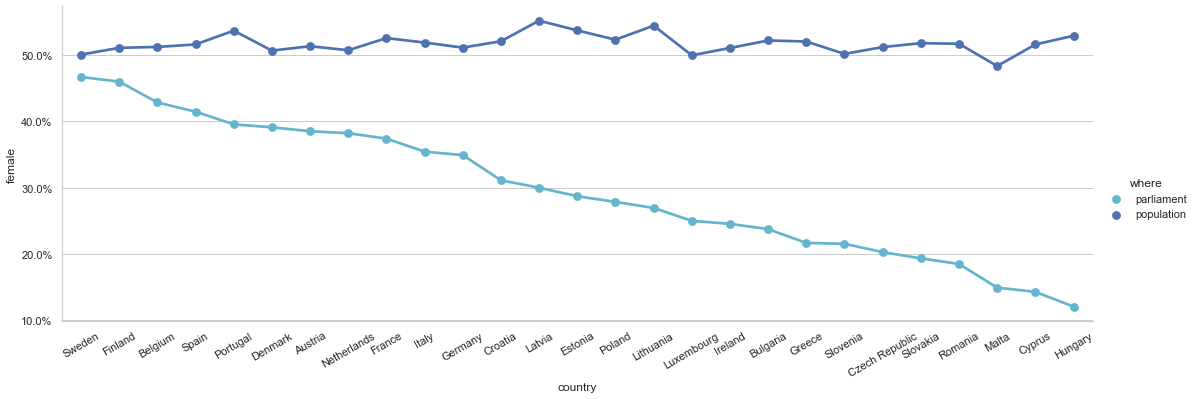

In [253]:
# Visualization of the proportion of women in population and parliament
catplot_female = sns.catplot(data = female_concat, x = 'country', 
                            y = 'female', kind ='point', hue='where', palette={"population": "b", "parliament": "c"}, 
                             edgecolor=".6", height = 5, aspect = 3)
catplot_female.set_xticklabels(rotation=30)
for ax in catplot_female.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(100))
#plt.show()

## 2.5 Visualization 4: Propotion of women in population and parliaments

I want to use the line graph as shown in the cell above in my data story. However, I decided again to use the tool Flourish to display the visualization because of the same reasons: the sizes of the x- and y-axis can more easily be adjusted, so that it fits the wordpress layout. In addition, Flourish offers an option to link the data sources to the graph which I want to use for trustworthy and elegant reasons. Moreover, Florish is handy for displaying the differences in percentage points via mouse over as an interactive element for interested readers.

https://public.flourish.studio/visualisation/8108946/
